In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Statistics of International Tourists to India [1981 - 2020]

In [3]:
df=pd.read_csv("India-Tourism-Statistics-1981-2020-fta_nri_ita.csv")
fta=df.copy()
fta.head()

,Year,FTAs in India (in million),%- change over previous year,NRIs arrivals in India (in million),%- change over the previous year,ITAs in India (in million),%- change over the previous year.1
0,1981,1.28,2.0,NaN,NaN,NaN,NaN
1,1991,1.68,-1.7,NaN,NaN,NaN,NaN
2,2001,2.54,-4.2,NaN,NaN,NaN,NaN
3,2002,2.38,-6.0,NaN,NaN,NaN,NaN
4,2003,2.73,14.3,NaN,NaN,NaN,NaN


In [4]:
fta.rename(columns={'FTAs in India (in million)': 'FTA','NRIs arrivals in India (in million)':'NRI','ITAs in India  (in million)':'ITA'},inplace=True, errors='raise')
fta.drop(fta_nri_ita.iloc[:,2::2],axis=1,inplace=True) 
fta.head()

,Year,FTA,NRI,ITA
0,1981,1.28,NaN,NaN
1,1991,1.68,NaN,NaN
2,2001,2.54,NaN,NaN
3,2002,2.38,NaN,NaN
4,2003,2.73,NaN,NaN


In [15]:
df=pd.melt(fta,['Year']).rename(columns={'variable':'Tourists'})
df

,Year,Tourists,value
0,1981,FTA,1.28
1,1991,FTA,1.68
2,2001,FTA,2.54
3,2002,FTA,2.38
4,2003,FTA,2.73
...,...,...,...
61,2016,ITA,15.03
62,2017,ITA,16.81
63,2018,ITA,17.42
64,2019,ITA,17.91


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

[]

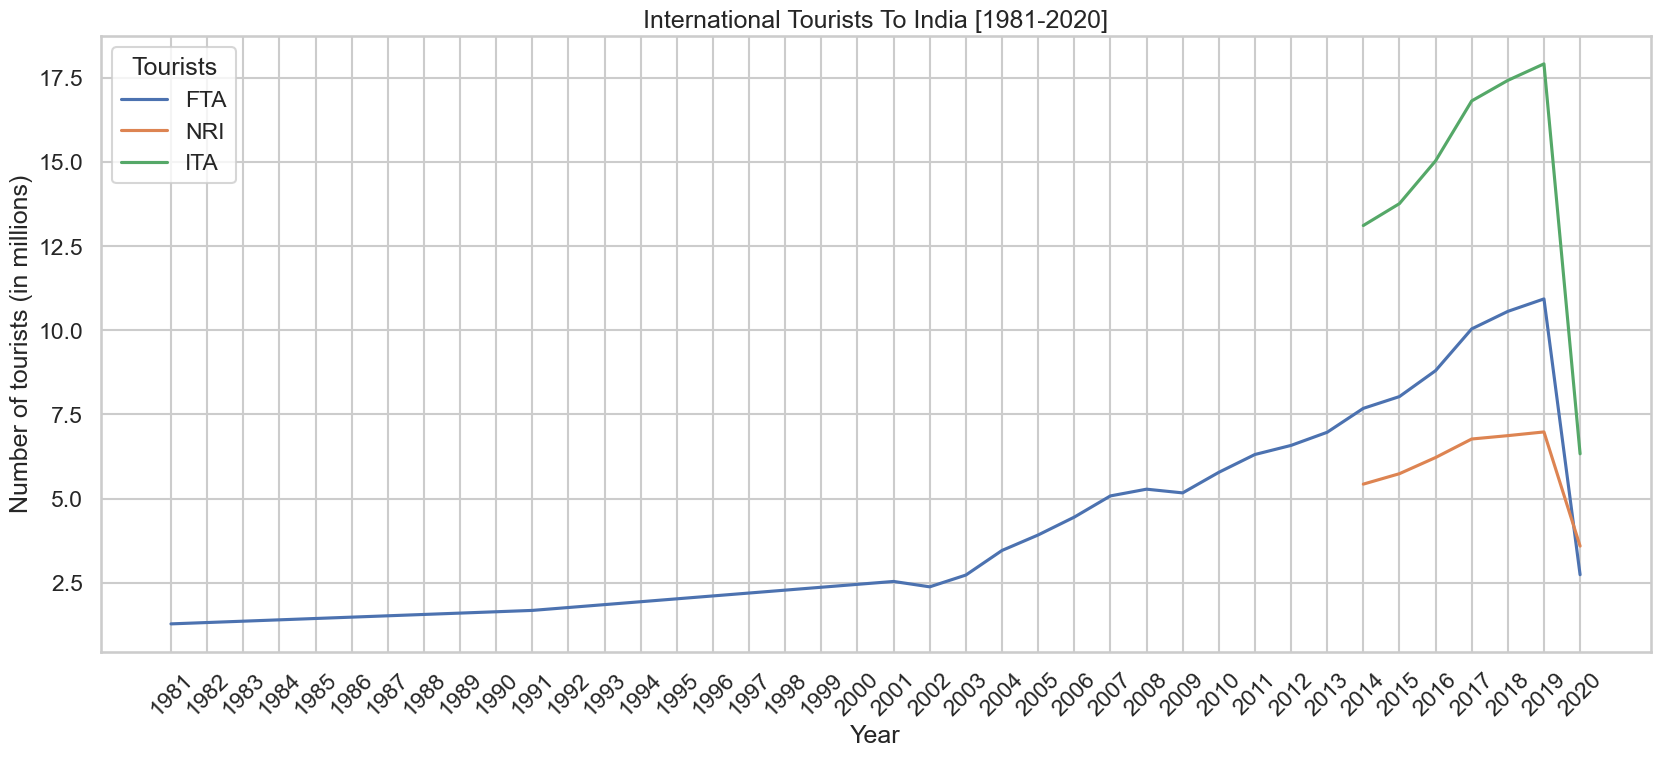

In [16]:
plt.figure(figsize=(20,8)) 

sns.set_context("talk") 
g=sns.lineplot(x='Year', y='value', hue='Tourists', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in millions)", title="International Tourists To India [1981-2020]")
plt.xticks(
    range(1981,2021),
    rotation=45,
    fontweight='light'
)

plt.plot()

# Quarterly Distribution of Tourists [2001 - 2019]

In [20]:
quarterly = pd.read_csv("India-Tourism-Statistics-2001-2019-quaterly.csv").copy()
column_names = {
    '% Distribution by Quarter - 1st Quarter (Jan-Mar)': '1st Quarter',
    '% Distribution by Quarter - 2nd Quarter(Apr-June)': '2nd Quarter',
    '% Distribution by Quarter - 3rd Quarter (July-Sep)': '3rd Quarter',
    '% Distribution by Quarter - 4th Quarter (Oct-Dec)': '4th Quarter'
}
quarterly.rename(columns=column_names, inplace=True)
quarterly.head()


,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2001,2537282,31.3,20.2,23.0,25.5
1,2002,2384364,28.8,18.4,21.1,31.7
2,2003,2726214,27.7,17.6,22.8,31.9
3,2004,3457477,27.8,18.3,21.8,32.1
4,2005,3918610,28.3,18.4,21.4,31.9


In [23]:
total_arrivals = quarterly[['Year', 'Arrivals']].copy()
total_arrivals["Arrivals"] = total_arrivals['Arrivals'] * (10**-6)
total_arrivals = total_arrivals.round(decimals=2)
total_arrivals.head()


,Year,Arrivals
0,2001,2.54
1,2002,2.38
2,2003,2.73
3,2004,3.46
4,2005,3.92


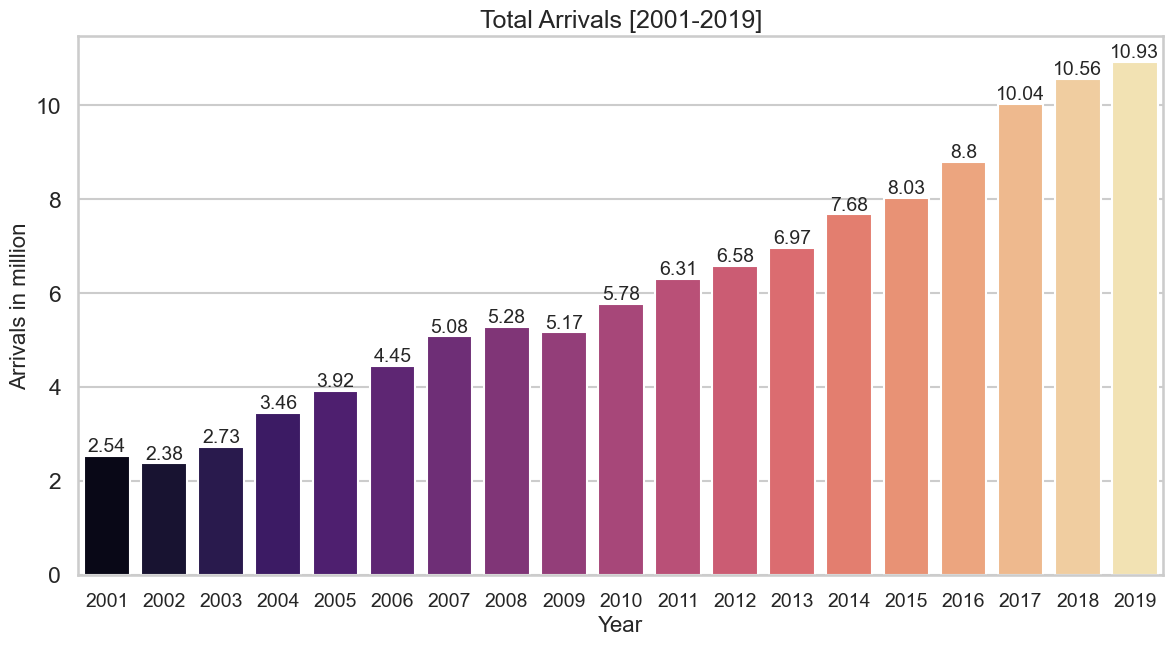

In [34]:
plt.figure(figsize=(14, 7))
g = sns.barplot(x=total_arrivals['Year'], y=total_arrivals["Arrivals"], palette='magma')  

plt.title("Total Arrivals [2001-2019]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Arrivals in million", fontsize=16)
plt.xticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=14)

plt.show()


# Quarterly Distribution of FTAs during 2017, 2018 and 2019

In [35]:
quarterly2017=quarterly[quarterly['Year']==2017].copy()
quarterly2017=quarterly2017.drop(['Arrivals','Year'],axis=1) #axis=1 specifies columnwise

quarterly2018=quarterly[quarterly['Year']==2018].copy()
quarterly2018=quarterly2018.drop(['Arrivals','Year'],axis=1)

quarterly2019=quarterly[quarterly['Year']==2019].copy()
quarterly2019=quarterly2019.drop(['Arrivals','Year'],axis=1)

In [38]:
quarterly2017.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
16,27.7,20.0,22.1,30.2


In [39]:
quarterly2018.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
17,29.5,19.2,21.9,29.3


In [40]:
quarterly2019.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
18,29.1,19.4,21.7,29.9


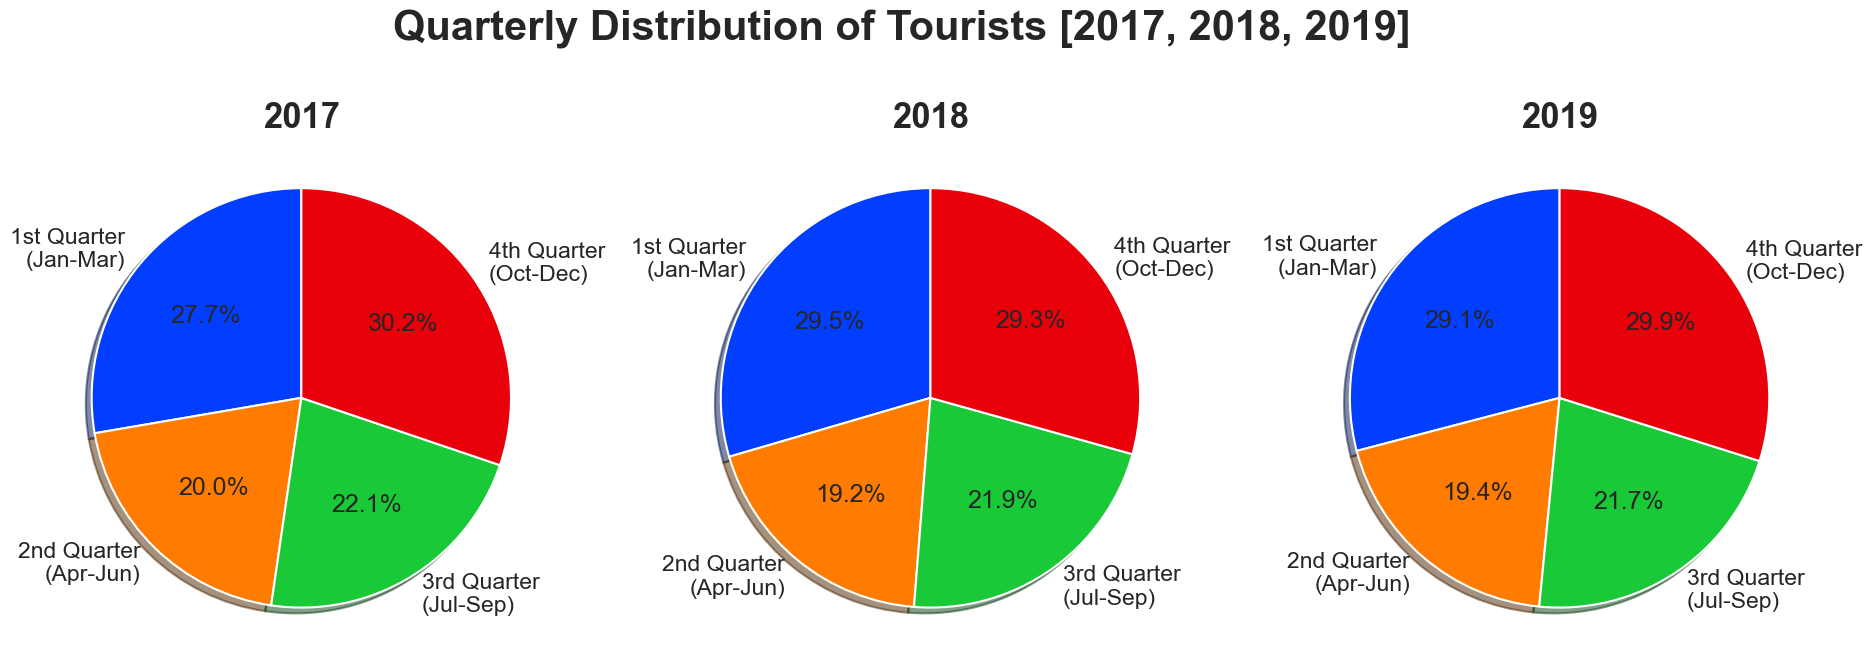

In [43]:
import seaborn as sns

colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(23, 8))
fig.suptitle('Quarterly Distribution of Tourists [2017, 2018, 2019]', fontsize=30, fontweight='bold')

quarter_labels = ['1st Quarter\n(Jan-Mar)', '2nd Quarter\n(Apr-Jun)', '3rd Quarter\n(Jul-Sep)', '4th Quarter\n(Oct-Dec)']

axes[0].pie(quarterly2017.loc[16, :].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title("2017", fontsize=25, fontweight='bold')

axes[1].pie(quarterly2018.loc[17, :].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("2018", fontsize=25, fontweight='bold')

axes[2].pie(quarterly2019.loc[18, :].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title("2019", fontsize=25, fontweight='bold')

plt.show()


#  Average Percentage Distribution of FTAs Quarterly [2001 - 2019]

In [44]:
# Here we are Fetching each quarterly data
quarter1=quarterly[['Year','1st Quarter']].copy()
quarter2=quarterly[['Year','2nd Quarter']].copy()
quarter3=quarterly[['Year','3rd Quarter']].copy()
quarter4=quarterly[['Year','4th Quarter']].copy()

# Then we are converting %ages to actual values
quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

##### Finding average %ages for each quarter from 2001 to 2019

In [45]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[28.807179062028148, 19.187795324983707, 21.64875763359771, 30.349040603325218]

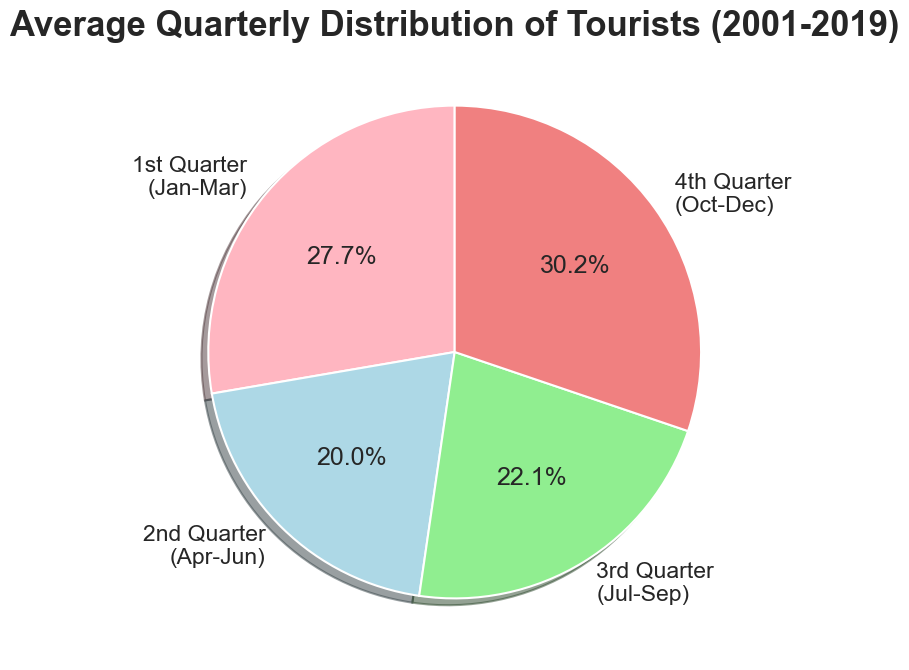

In [49]:
colors = ['lightpink', 'lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 8))
plt.pie(quarterly2017.loc[16, :].values.tolist(), labels=quarter_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Average Quarterly Distribution of Tourists (2001-2019)", fontsize=25, fontweight='bold')

plt.show()


# Statistics of ITAs to India based on purpose 2019 [Regionwise]

In [50]:
country_and_reason=pd.read_csv("India-Tourism-Statistics-2019_region-and-reason.csv")
country_and_reason.head()

,Region,Country of Nationality,Arrivals (in numbers),Business and Professional(%),Leisure Holiday and Recreation(%),Medical(%),Indian Diaspora(%),Others(%)
0,North America,CANADA,351859,4.82,50.94,0.14,21.49,22.61
1,North America,UNITED STATES,1512032,11.24,38.56,0.08,29.48,20.64
2,North America,OTHERS,1,0.00,100.00,0.00,0.00,0.00
3,North America,Total,1863892,10.03,40.90,0.09,27.97,21.01
4,Central & South America,ARGENTINA,12844,14.69,78.60,0.08,1.25,5.38


In [51]:
regionwise_reason = country_and_reason[country_and_reason['Country of Nationality']=='Total'].copy()

regionwise_reason['Business and Professional'] = regionwise_reason['Business and Professional(%)'] * regionwise_reason['Arrivals (in numbers)'] / 100 * 10**-5
regionwise_reason['Leisure Holiday and Recreation'] = regionwise_reason['Leisure Holiday and Recreation(%)'] * regionwise_reason['Arrivals (in numbers)'] / 100 * 10**-5
regionwise_reason['Medical'] = regionwise_reason['Medical(%)'] * regionwise_reason['Arrivals (in numbers)'] / 100 * 10**-5
regionwise_reason['Indian Diaspora'] = regionwise_reason['Indian Diaspora(%)'] * regionwise_reason['Arrivals (in numbers)'] / 100 * 10**-5
regionwise_reason['Others'] = regionwise_reason['Others(%)'] * regionwise_reason['Arrivals (in numbers)'] / 100 * 10**-5

regionwise_reason.drop(['Arrivals (in numbers)', 'Country of Nationality'], axis=1, inplace=True)

regionwise_reason.rename(columns={
    'Business and Professional(%)': 'Business and Professional',
    'Leisure Holiday and Recreation(%)': 'Leisure Holiday and Recreation',
    'Medical(%)': 'Medical',
    'Indian Diaspora(%)': 'Indian Diaspora',
    'Others(%)': 'Others'
}, inplace=True)

regionwise_reason.set_index('Region', inplace=True)

regionwise_reason.head()


,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
Region,,,,,,,,,,
North America,10.03,40.90,0.09,27.97,21.01,1.869484,7.623318,0.016775,5.213306,3.916037
Central & South America,20.24,64.31,0.17,3.38,11.90,0.200226,0.636193,0.001682,0.033437,0.117722
Western Europe,17.25,45.68,0.10,20.23,16.74,3.757811,9.951118,0.021784,4.406986,3.646710
Eastern Europe,12.42,71.53,5.15,1.69,9.21,0.566949,3.265209,0.235088,0.077145,0.420419
Africa,18.67,31.16,14.46,7.52,28.19,0.676429,1.128952,0.523897,0.272456,1.021346


<Figure size 2800x1000 with 0 Axes>

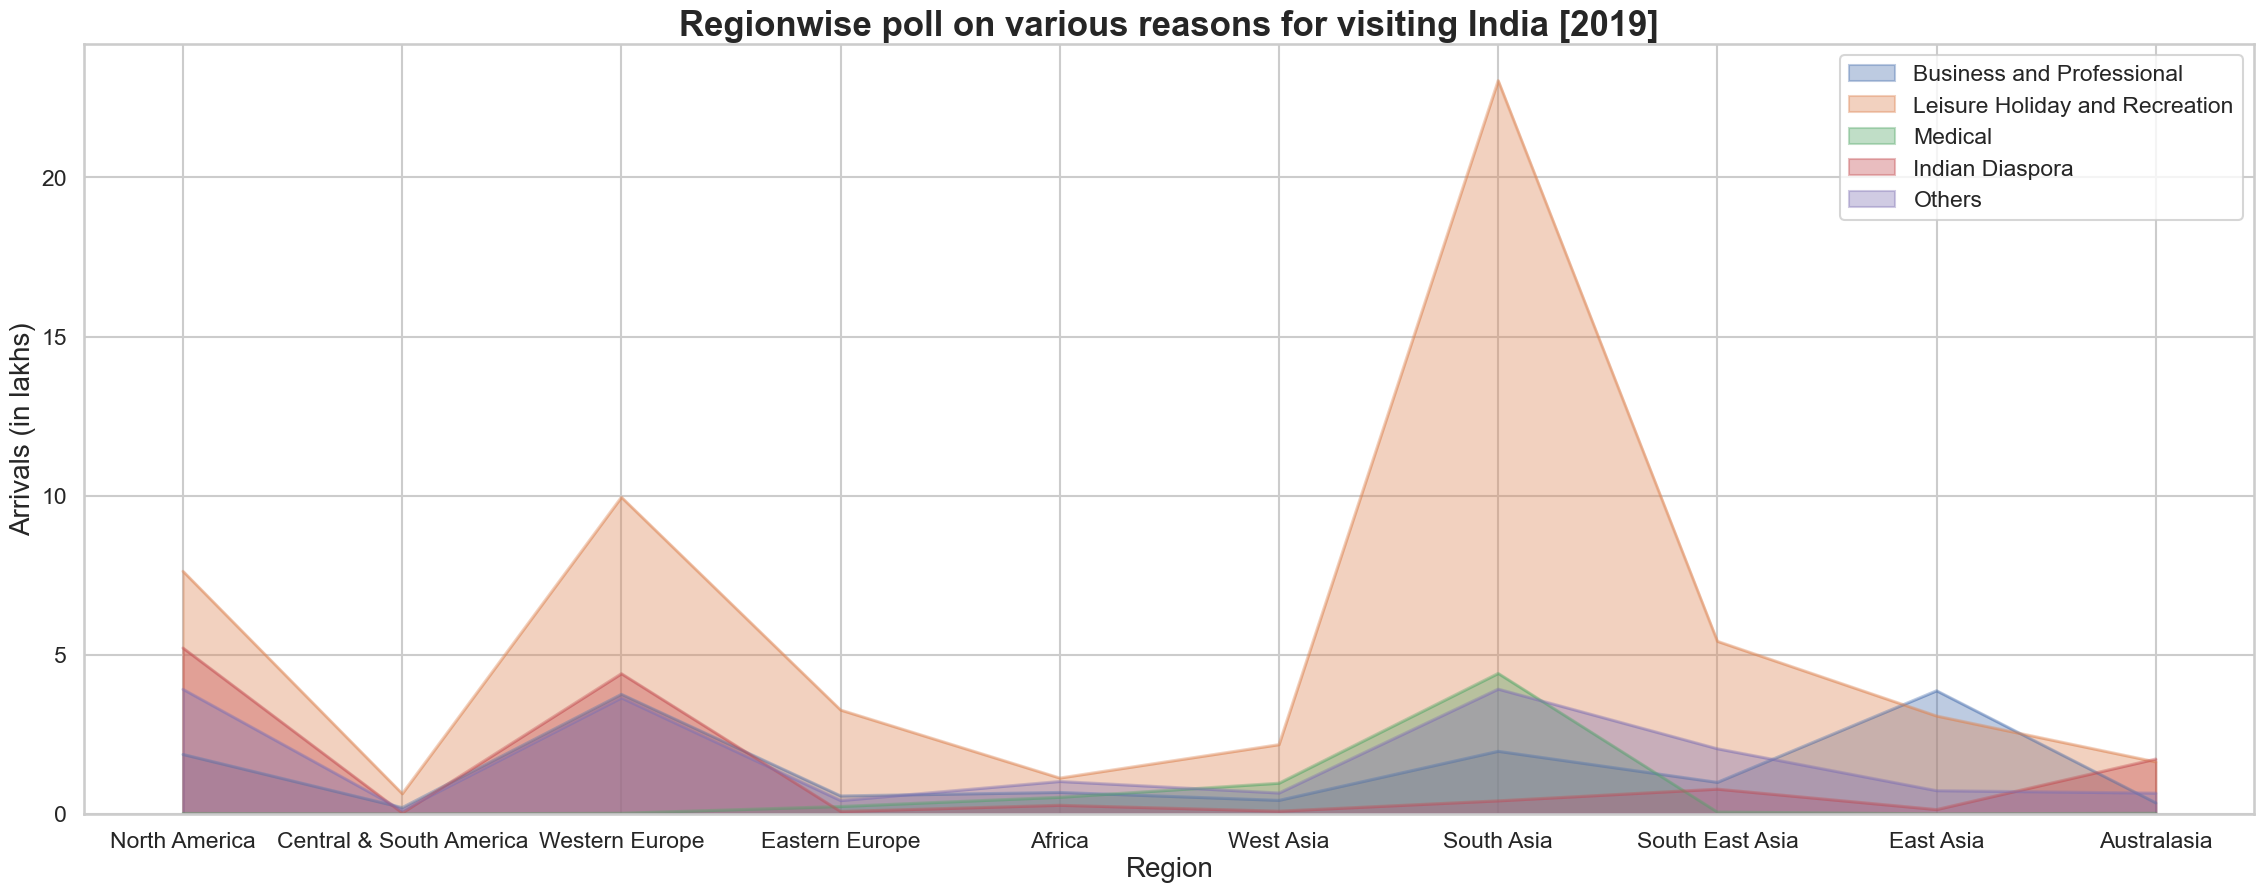

In [115]:
plt.figure(figsize=(28, 10))
g = regionwise_reason.plot(kind='area',
                           stacked=False,
                           alpha=0.37,  
                           figsize=(28, 10))

g.set_xticks(range(len(regionwise_reason.index)))
g.set_xticklabels(regionwise_reason.index)

plt.title('Regionwise poll on various reasons for visiting India [2019]', fontsize=25, fontweight='bold')
plt.xlabel('Region', fontsize=20)
plt.ylabel('Arrivals (in lakhs)', fontsize=20)

plt.show()


## Tourists to India from Top 5 countries - 2019

In [116]:
countrywise = country_and_reason[country_and_reason['Country of Nationality'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS']) == False].copy()
countrywise.sort_values(by=["Arrivals (in numbers)"], ascending=False, inplace=True)
countrywise = countrywise.iloc[0:5,:]
countrywise.drop(["Region"], axis=1, inplace=True)

countrywise.rename(columns={
    'Business and Professional(%)': 'Business and Professional',
    'Leisure Holiday and Recreation(%)': 'Leisure Holiday and Recreation',
    'Medical(%)': 'Medical',
    'Indian Diaspora(%)': 'Indian Diaspora',
    'Others(%)': 'Others'
}, inplace=True)

countrywise['Business and Professional'] = countrywise['Business and Professional'] * countrywise['Arrivals (in numbers)'] / 100 * 10**-3
countrywise['Leisure Holiday and Recreation'] = countrywise['Leisure Holiday and Recreation'] * countrywise['Arrivals (in numbers)'] / 100 * 10**-3
countrywise['Medical'] = countrywise['Medical'] * countrywise['Arrivals (in numbers)'] / 100 * 10**-3
countrywise['Indian Diaspora'] = countrywise['Indian Diaspora'] * countrywise['Arrivals (in numbers)'] / 100 * 10**-3
countrywise['Others'] = countrywise['Others'] * countrywise['Arrivals (in numbers)'] / 100 * 10**-3

countrywise.drop(["Arrivals (in numbers)"], axis=1, inplace=True)

countrywise.head()


,Country of Nationality,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
55,BANGLADESH,108.522307,1994.129607,396.969958,20.364043,57.741085
1,UNITED STATES,169.952397,583.039539,1.209626,445.747034,312.083405
24,UNITED KINGDOM,107.931507,405.418348,1.000292,302.688359,183.153465
78,AUSTRALIA,29.893417,132.904518,0.367241,154.645185,49.430639
0,CANADA,16.959604,179.236975,0.492603,75.614499,79.555320


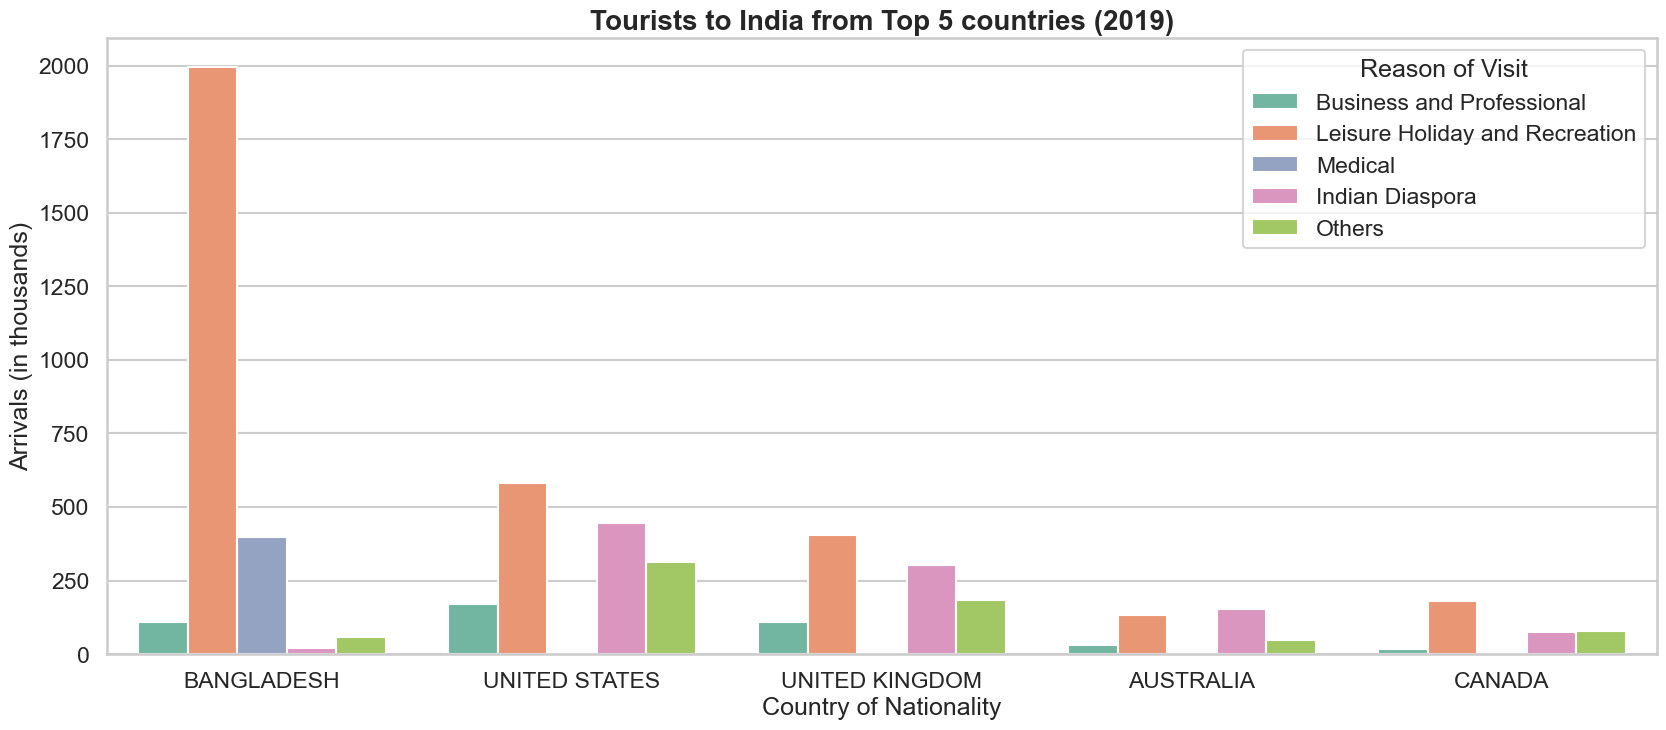

In [118]:
df = pd.melt(countrywise, ['Country of Nationality']).rename(columns={"variable":"Reason of Visit"})

plt.figure(figsize=(20,8))

sns.barplot(x='Country of Nationality', y='value', hue="Reason of Visit", data=df, palette='Set2')

plt.ylabel("Arrivals (in thousands)", fontsize=18)
plt.xlabel('Country of Nationality', fontsize=18)
plt.title("Tourists to India from Top 5 countries (2019)", fontsize=20, fontweight='bold')

plt.show()


## Average Distribution of Tourists to India based on the purpose of visit - 2019

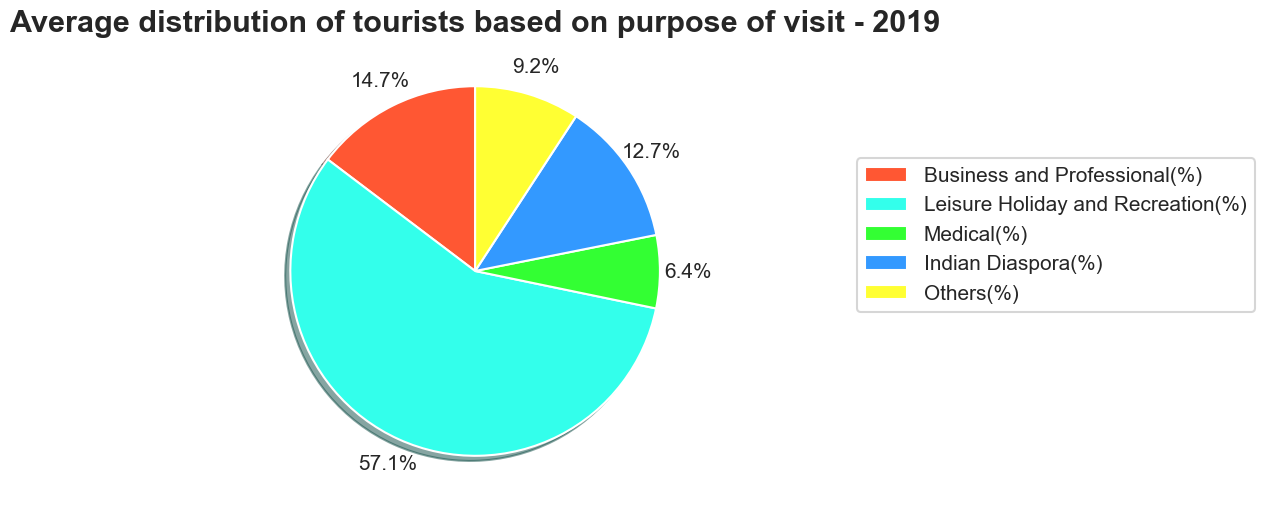

In [120]:
grand_total = country_and_reason[country_and_reason['Country of Nationality'] == 'Grand Total'].copy()

reason_list = ['Business and Professional(%)', 'Leisure Holiday and Recreation(%)', 'Medical(%)', 'Indian Diaspora(%)', 'Others(%)']
colors = ['#FF5733', '#33FFEB', '#33FF33', '#3399FF', '#FFFF33']  # Bold colors

plt.figure(figsize=(8,6))

pie = plt.pie(grand_total.loc[83,:].values.tolist()[3:], colors=colors, 
              autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 15}, pctdistance=1.15)

plt.legend(pie[0], reason_list, bbox_to_anchor=(1.5, 0.7), loc="upper right", fontsize=15, bbox_transform=plt.gcf().transFigure)

plt.title("Average distribution of tourists based on purpose of visit - 2019", fontsize=22, fontweight='bold')

plt.show()


# Contribution Statistics to the Share Market of Indian Tourism [2017 - 2019]

### Contribution to the Share Market of Indian Tourism regionwise [2017 - 2019]

In [67]:
country_and_share=pd.read_csv("India-Tourism-Statistics-region-2017-2019.csv")
country_and_share.head()

,Region,Country of Nationality,Number of Arrivals - 2017,Number of Arrivals - 2018,Number of Arrivals - 2019,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019,Percentage Change - 2018/17,Percentage Change - 2019/18
0,North America,Canada,335439.0,351040.0,351859,3.34,3.32,3.22,4.7,0.2
1,North America,U.S.A,1376919.0,1456678.0,1512032,13.72,13.80,13.83,5.8,3.8
2,North America,Others,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,North America,Total,1712358.0,1807718.0,1863892,17.06,17.12,17.05,5.6,3.1
4,Central and South America,Argentina,14875.0,16345.0,12844,0.15,0.15,0.12,9.9,-21.4


In [121]:
regionwise_share=country_and_share[country_and_share['Country of Nationality']=='Total'].copy()
regionwise_share=regionwise_share[['Region','Percentage Share - 2017','Percentage Share - 2018','Percentage Share - 2019']]
regionwise_share.set_index('Region',inplace=True)
regionwise_share.head()

,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019
Region,,,
North America,17.06,17.12,17.05
Central and South America,0.92,0.96,0.91
Western Europe,21.26,21.25,19.93
Eastern Europe,4.71,4.41,4.18
Africa,3.17,3.33,3.31


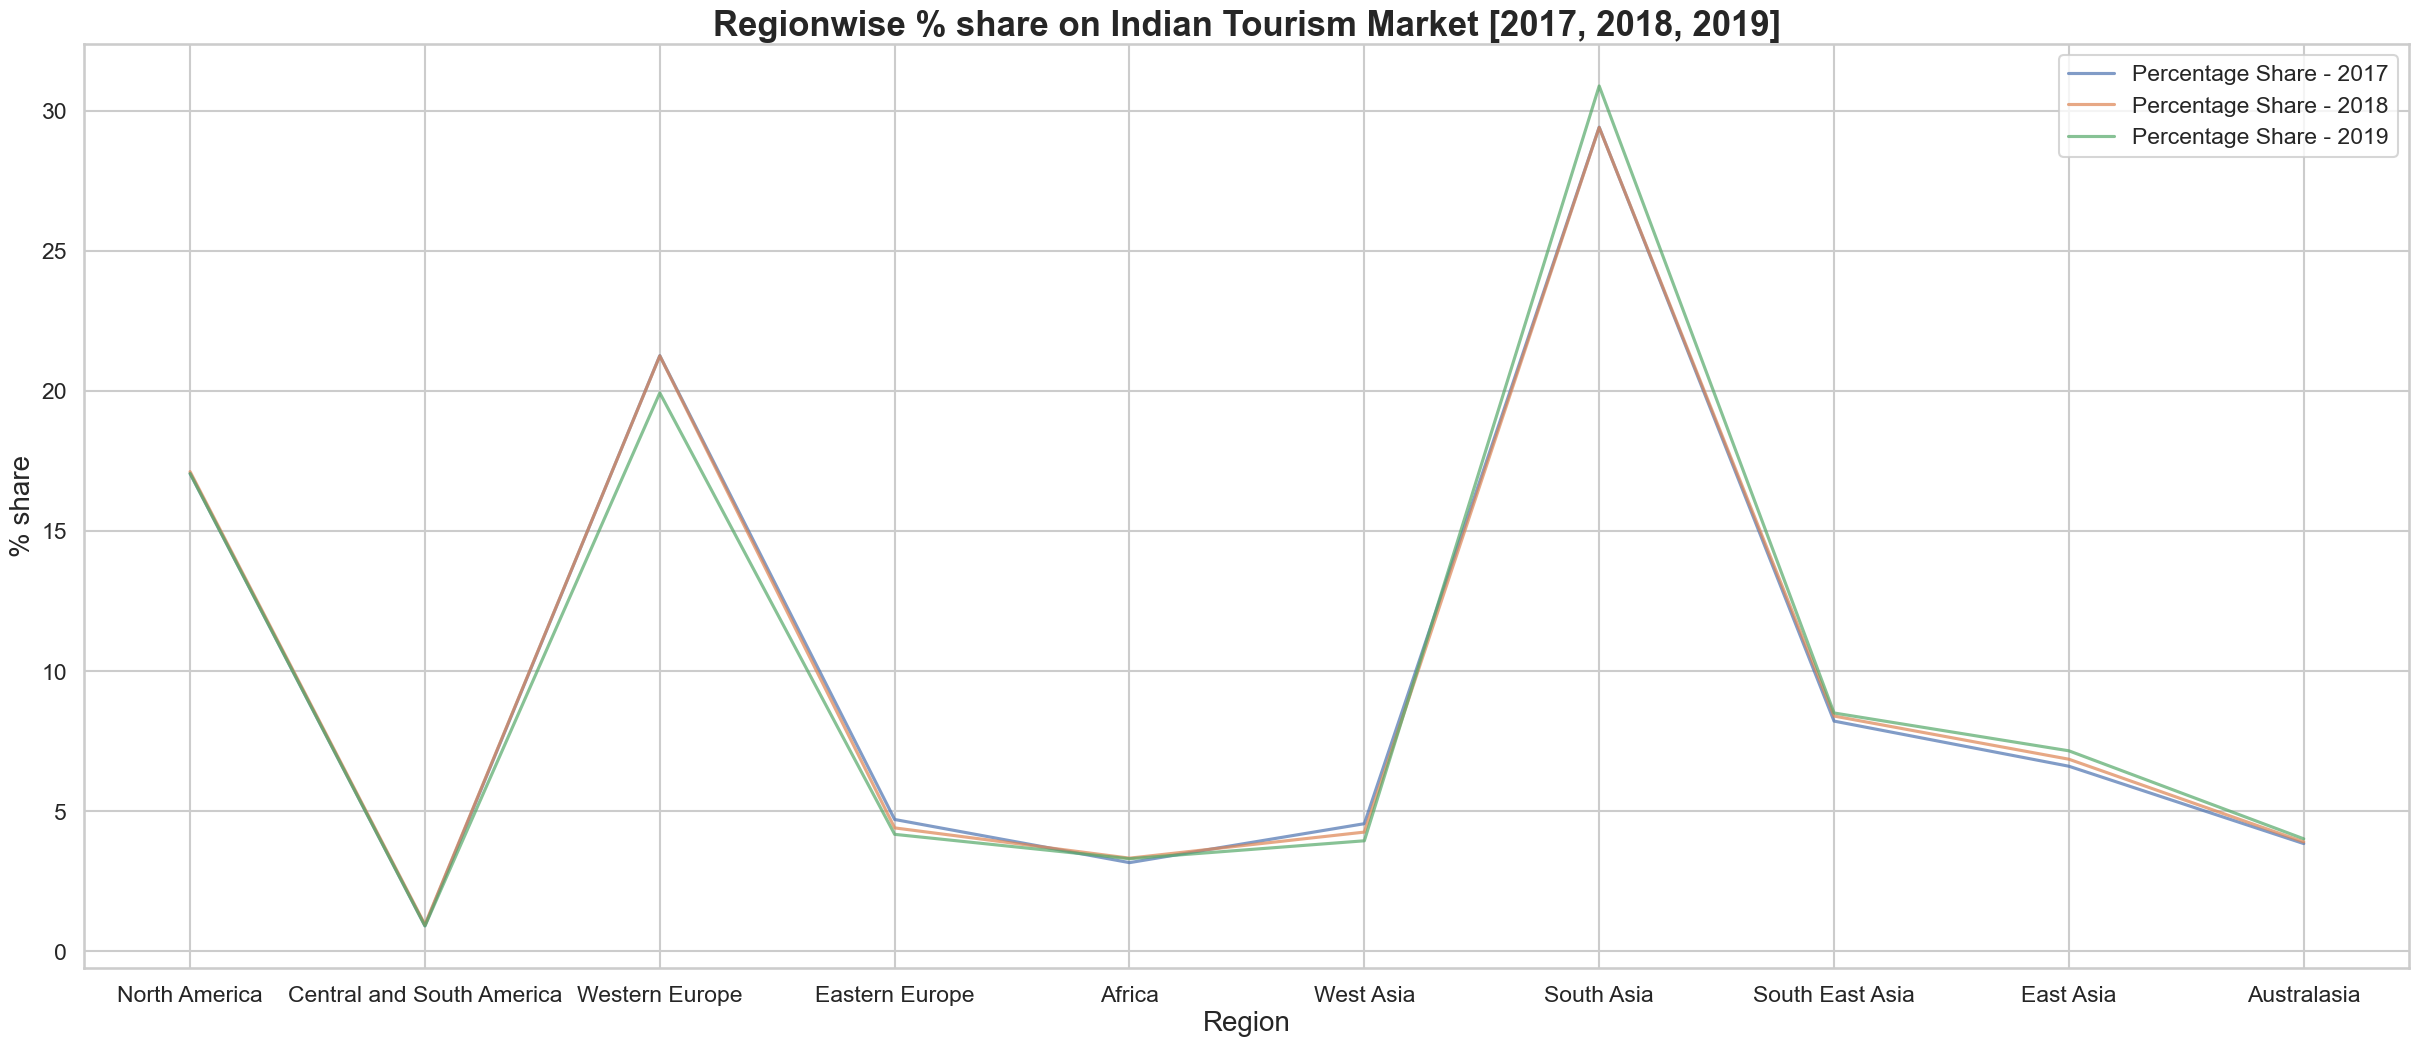

In [124]:
g=regionwise_share.plot(kind = 'line',
              stacked = False,
              alpha = 0.7, 
              figsize =(30,12),
             )

g.set_xticks(range(len(regionwise_share.index)));
g.set_xticklabels(regionwise_share.index);

i=0

plt.title('Regionwise % share on Indian Tourism Market [2017, 2018, 2019]',fontsize=25,fontweight='bold')
plt.xlabel('Region',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.xticks()

plt.show()


# Contribution to the Indian Tourism Share Market countrywise [2017 - 2019]

##### Preparing the Dataset

In [125]:
# 2017
highest_countrywise_2017 = country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2017 = highest_countrywise_2017[['Country of Nationality','Percentage Share - 2017']]
highest_countrywise_2017.sort_values(by=['Percentage Share - 2017'], ascending=False, inplace=True)
highest_countrywise_2017 = highest_countrywise_2017.iloc[0:6,:]
perc_sum = highest_countrywise_2017['Percentage Share - 2017'].sum()
highest_countrywise_2017 = pd.concat(
    [highest_countrywise_2017, pd.DataFrame.from_records([{'Country of Nationality':'Others',
                                                           'Percentage Share - 2017':(100-perc_sum)}])],
    ignore_index=True)

# 2018
highest_countrywise_2018 = country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2018 = highest_countrywise_2018[['Country of Nationality','Percentage Share - 2018']]
highest_countrywise_2018.sort_values(by=['Percentage Share - 2018'], ascending=False, inplace=True)
highest_countrywise_2018 = highest_countrywise_2018.iloc[0:6,:]
perc_sum = highest_countrywise_2018['Percentage Share - 2018'].sum()
highest_countrywise_2018 = pd.concat(
    [highest_countrywise_2018, pd.DataFrame.from_records([{'Country of Nationality':'Others',
                                                           'Percentage Share - 2018':(100-perc_sum)}])],
    ignore_index=True)

# 2019
highest_countrywise_2019 = country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2019 = highest_countrywise_2019[['Country of Nationality','Percentage Share - 2019']]
highest_countrywise_2019.sort_values(by=['Percentage Share - 2019'], ascending=False, inplace=True)
highest_countrywise_2019 = highest_countrywise_2019.iloc[0:6,:]
perc_sum = highest_countrywise_2019['Percentage Share - 2019'].sum()
highest_countrywise_2019 = pd.concat(
    [highest_countrywise_2019, pd.DataFrame.from_records([{'Country of Nationality':'Others',
                                                           'Percentage Share - 2019':(100-perc_sum)}])],
    ignore_index=True)


#####  plotting subplots (pie charts)

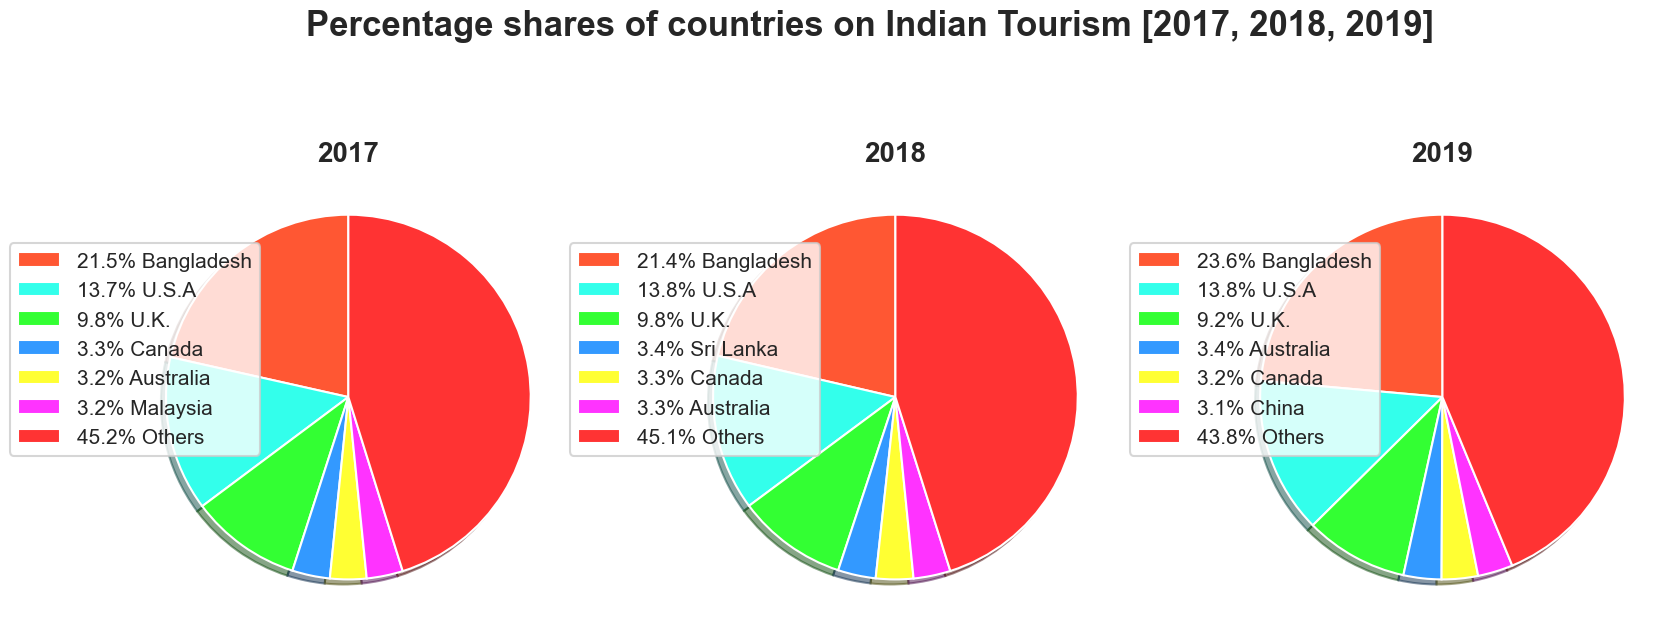

In [126]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(20,8))
fig.suptitle('Percentage shares of countries on Indian Tourism [2017, 2018, 2019]', fontsize=25, fontweight='bold')

colors = ['#FF5733', '#33FFEB', '#33FF33', '#3399FF', '#FFFF33', '#FF33FF', '#FF3333']  

# 2017
pie = axes[0].pie(highest_countrywise_2017['Percentage Share - 2017'], colors=colors, shadow=True, startangle=90)
percents = highest_countrywise_2017['Percentage Share - 2017'] * 100 / highest_countrywise_2017['Percentage Share - 2017'].sum()
axes[0].legend(
    pie[0], [f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2017['Country of Nationality'])],
    bbox_to_anchor=(0.2,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[0].set_title("2017", fontsize=20, fontweight='bold')

# 2018
pie = axes[1].pie(highest_countrywise_2018['Percentage Share - 2018'], colors=colors, shadow=True, startangle=90)
percents = highest_countrywise_2018['Percentage Share - 2018'] * 100 / highest_countrywise_2018['Percentage Share - 2018'].sum()
axes[1].legend(
    pie[0], [f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2018['Country of Nationality'])],
    bbox_to_anchor=(0.48,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[1].set_title("2018", fontsize=20, fontweight='bold')

# 2019
pie = axes[2].pie(highest_countrywise_2019['Percentage Share - 2019'], colors=colors, shadow=True, startangle=90)
percents = highest_countrywise_2019['Percentage Share - 2019'] * 100 / highest_countrywise_2019['Percentage Share - 2019'].sum()
axes[2].legend(
    pie[0], [f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2019['Country of Nationality'])],
    bbox_to_anchor=(0.76,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axes[2].set_title("2019", fontsize=20, fontweight='bold')

plt.show()


# Tourist segregation based on age [2001 - 2019]

### FTAs segregated based on age [2001 - 2019]

In [72]:
agegroup=pd.read_csv("India-Tourism-Statistics-2001-2019-agegroup.csv")
agegroup.head()

,Year,FTAs,% distribution by Age-Group (in Year) - 0-14,% distribution by Age-Group (in Year) - 15-24,% distribution by Age-Group (in Year) - 25-34,% distribution by Age-Group (in Year) - 35-44,% distribution by Age-Group (in Year) - 45-54,% distribution by Age-Group (in Year) - 55-64,% distribution by Age-Group (in Year) - 65 and above,% distribution by Age-Group (in Year) - Not Reported
0,2001,2537282,7.0,10.8,20.1,21.1,19.4,11.9,6.7,3.0
1,2002,2384364,9.2,10.0,19.4,21.6,19.4,11.5,7.7,1.2
2,2003,2726214,7.2,10.0,19.5,21.6,19.4,11.5,7.7,3.1
3,2004,3457477,8.5,9.8,18.8,21.3,19.4,12.8,8.2,0.2
4,2005,3918610,8.6,9.6,18.8,21.3,19.5,13.0,8.7,0.5


In [133]:
# Renaming the columns
agegroup_elaborate=agegroup.copy().rename(columns={
    '% distribution by Age-Group (in Year) - 0-14':'0-14',
    '% distribution by Age-Group (in Year) - 15-24':'15-24',
    '% distribution by Age-Group (in Year) - 25-34':'25-34',
    '% distribution by Age-Group (in Year) - 35-44':'35-44',
    '% distribution by Age-Group (in Year) - 45-54':'45-54',
    '% distribution by Age-Group (in Year) - 55-64':'55-64',
    '% distribution by Age-Group (in Year) - 65 and above':'65 and above',
    '% distribution by Age-Group (in Year) - Not Reported':'Not Reported',
})

# converting %ages to actual values and shifting the decimal places by 3 to the left
agegroup_elaborate['0-14']=agegroup_elaborate['0-14']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['15-24']=agegroup_elaborate['15-24']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['25-34']=agegroup_elaborate['25-34']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['35-44']=agegroup_elaborate['35-44']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['45-54']=agegroup_elaborate['45-54']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['55-64']=agegroup_elaborate['55-64']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['65 and above']=agegroup_elaborate['65 and above']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['Not Reported']=agegroup_elaborate['Not Reported']*agegroup_elaborate['FTAs']/100 * 10**-3

agegroup_elaborate.head()

,Year,FTAs,0-14,15-24,25-34,35-44,45-54,55-64,65 and above,Not Reported
0,2001,2537282,177.609740,274.026456,509.993682,535.366502,492.232708,301.936558,169.997894,76.118460
1,2002,2384364,219.361488,238.436400,462.566616,515.022624,462.566616,274.201860,183.596028,28.612368
2,2003,2726214,196.287408,272.621400,531.611730,588.862224,528.885516,313.514610,209.918478,84.512634
3,2004,3457477,293.885545,338.832746,650.005676,736.442601,670.750538,442.557056,283.513114,6.914954
4,2005,3918610,337.000460,376.186560,736.698680,834.663930,764.128950,509.419300,340.919070,19.593050


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

[]

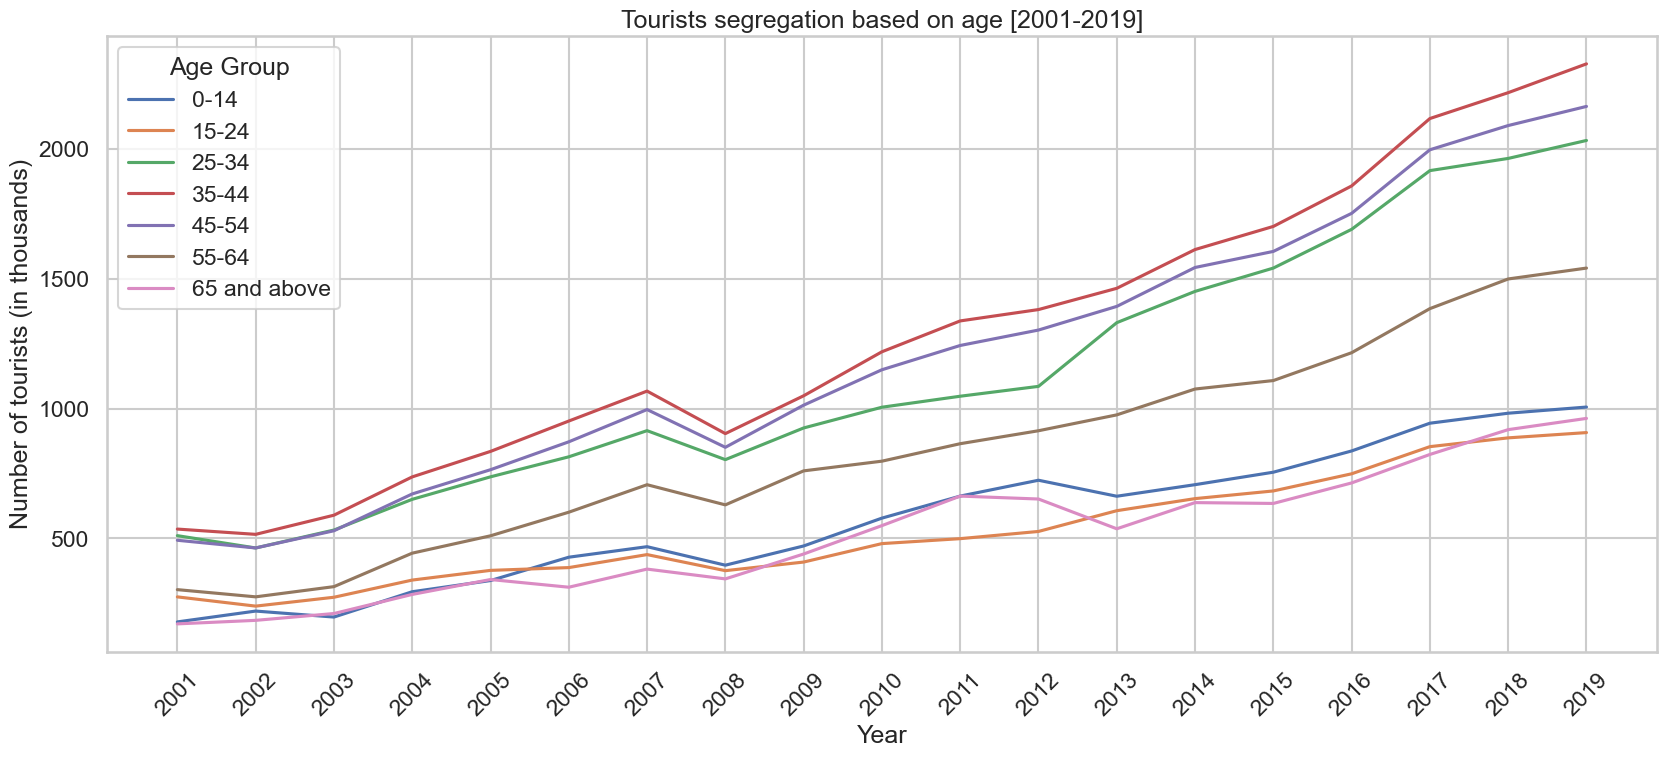

In [134]:
agegroup_elaborate.drop(['FTAs','Not Reported'],axis=1 ,inplace=True)

df=pd.melt(agegroup_elaborate,['Year']).rename(columns={"variable":"Age Group"})

plt.figure(figsize=(20,8))

sns.set_context("talk")

g=sns.lineplot(x='Year', y='value', hue='Age Group', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in thousands)", title="Tourists segregation based on age [2001-2019]")
plt.xticks(
    range(2001,2020),
    rotation=45,
    fontweight='light'
)

plt.plot()

# Average %age distribution of Tourists based on age [2001 - 2019]

#### Preparing the Dataset

In [75]:
# finding average %ages for each agegroup from their actual values
tot_fta=agegroup['FTAs'].sum()

# 10**5 (100 * 10**3) since distribution among agegroups was converted to thousands previously
avg_agegroup_pctg=[
    agegroup_elaborate['0-14'].sum()*10**5/tot_fta,
    agegroup_elaborate['15-24'].sum()*10**5/tot_fta,
    agegroup_elaborate['25-34'].sum()*10**5/tot_fta,
    agegroup_elaborate['35-44'].sum()*10**5/tot_fta,
    agegroup_elaborate['45-54'].sum()*10**5/tot_fta,
    agegroup_elaborate['55-64'].sum()*10**5/tot_fta,
    agegroup_elaborate['65 and above'].sum()*10**5/tot_fta
]

print(avg_agegroup_pctg)

[9.290327244694959, 8.526830283828492, 18.353340597195853, 20.92885960109853, 19.620265319294138, 13.637821302553538, 8.356931097199208]


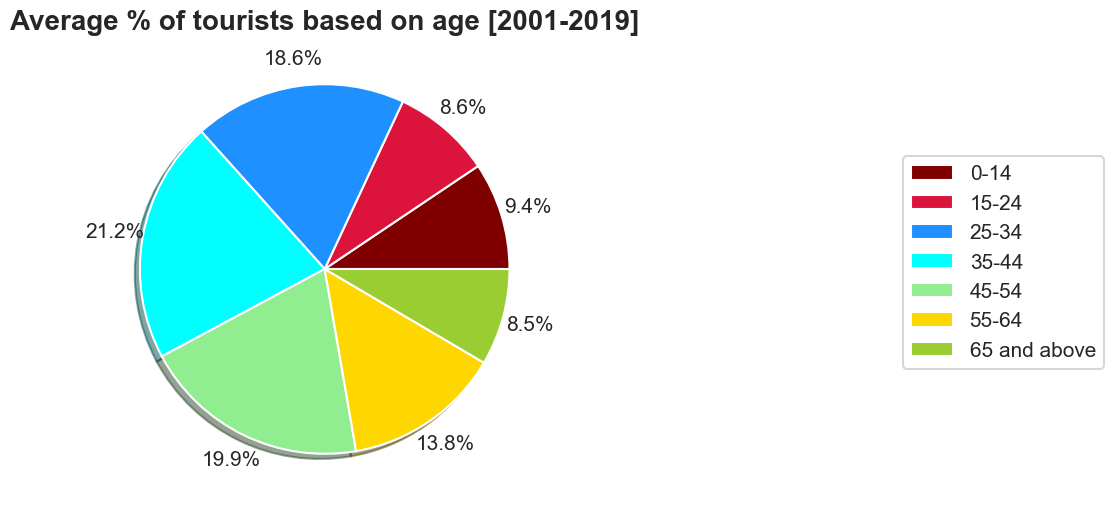

In [137]:
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','gold','yellowgreen']
agegroup_list=['0-14','15-24','25-34','35-44','45-54','55-64','65 and above']

plt.figure(figsize=(8,6))

pie=plt.pie(avg_agegroup_pctg, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=0,textprops={'fontsize': 15},pctdistance = 1.15,)

plt.legend(pie[0],agegroup_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.title("Average % of tourists based on age [2001-2019]",fontsize=20,fontweight='bold')

plt.show()


# Indian Tourism Statewise Statistics [2019 - 2020]

##  Foreign tourists per State/UTs [2019 - 2020]

In [77]:
statewise_data=pd.read_csv("India-Tourism-Statistics-statewise_2019-2020_domestic_foreign.csv")
statewise_data.head()

,S. No.,States/UTs,Domestic -2019,Foreign - 2019,Domestic -2020,Foreign - 2020,Growth rate - DTV 2020/19,Growth rate - FTV 2020/19
0,1,A&N Island,505398,16206,191207,5412,-62.17,-66.6
1,2,Andhra Pradesh,237051508,280356,70828590,67591,-70.12,-75.89
2,3,Arunachal Pradesh,555639,7825,42871,961,-92.28,-87.72
3,4,Assam,5447805,26878,1266898,7285,-76.74,-72.9
4,5,Bihar,33990038,1093141,5638024,308080,-83.41,-71.82


In [138]:
foreign_statewise=statewise_data[['States/UTs','Foreign - 2019','Foreign - 2020']].copy()

foreign_statewise.sort_values(by=['Foreign - 2019'], ascending=False, inplace=True)
foreign_statewise=foreign_statewise[foreign_statewise['States/UTs'].isin(['Grand Total'])==False]

foreign_statewise['Foreign - 2019']=foreign_statewise['Foreign - 2019'] * 10**-5
foreign_statewise['Foreign - 2020']=foreign_statewise['Foreign - 2020'] * 10**-5

foreign_statewise.head()

,States/UTs,Foreign - 2019,Foreign - 2020
31,Tamil Nadu,68.66327,12.28323
21,Maharashtra,55.28704,12.62409
34,Uttar Pradesh,47.45181,8.90932
9,Delhi,29.83436,6.81230
36,West Bengal,16.56145,4.63285


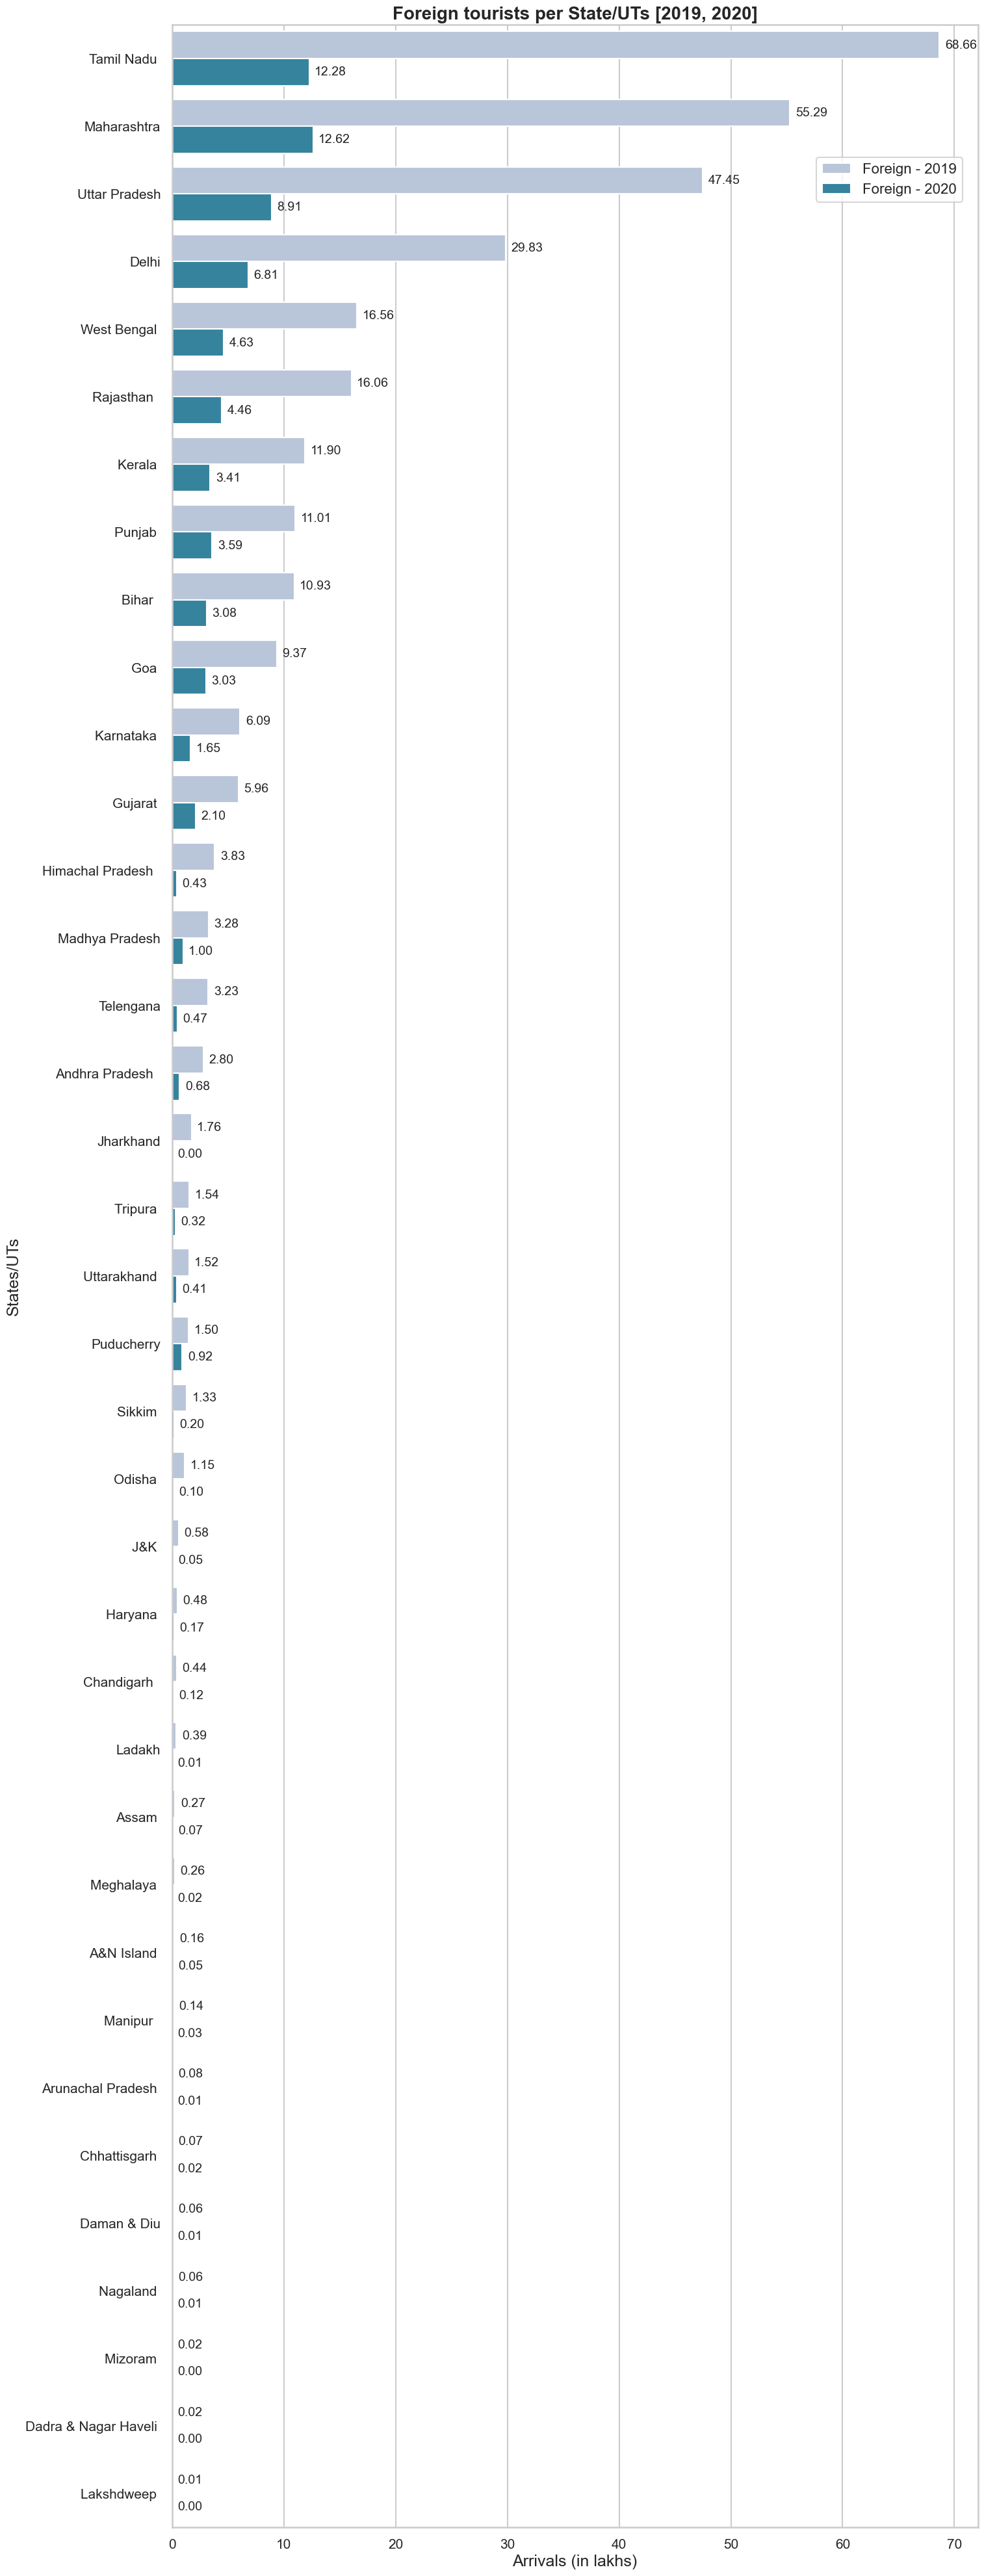

In [139]:
df = pd.melt(foreign_statewise, ['States/UTs']).rename(columns={"variable": "Year"})

plt.figure(figsize=(16, 50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='PuBuGn')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center', fontsize=14)

plt.title("Foreign tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99, 0.95), prop={'size': 16})

plt.show()


In [140]:
domestic_statewise=statewise_data[['States/UTs','Domestic -2019','Domestic -2020']].copy()
# sorting by Domestic-2019 in descending order
domestic_statewise.sort_values(by=['Domestic -2019'], ascending=False, inplace=True)
domestic_statewise=domestic_statewise[domestic_statewise['States/UTs'].isin(['Grand Total'])==False]

domestic_statewise['Domestic -2019']=domestic_statewise['Domestic -2019'] * 10**-5
domestic_statewise['Domestic -2020']=domestic_statewise['Domestic -2020'] * 10**-5

domestic_statewise.head()

,States/UTs,Domestic -2019,Domestic -2020
34,Uttar Pradesh,5358.55162,861.22293
31,Tamil Nadu,4948.65257,1406.51241
1,Andhra Pradesh,2370.51508,708.28590
16,Karnataka,2279.34714,774.53339
21,Maharashtra,1492.94703,392.34591


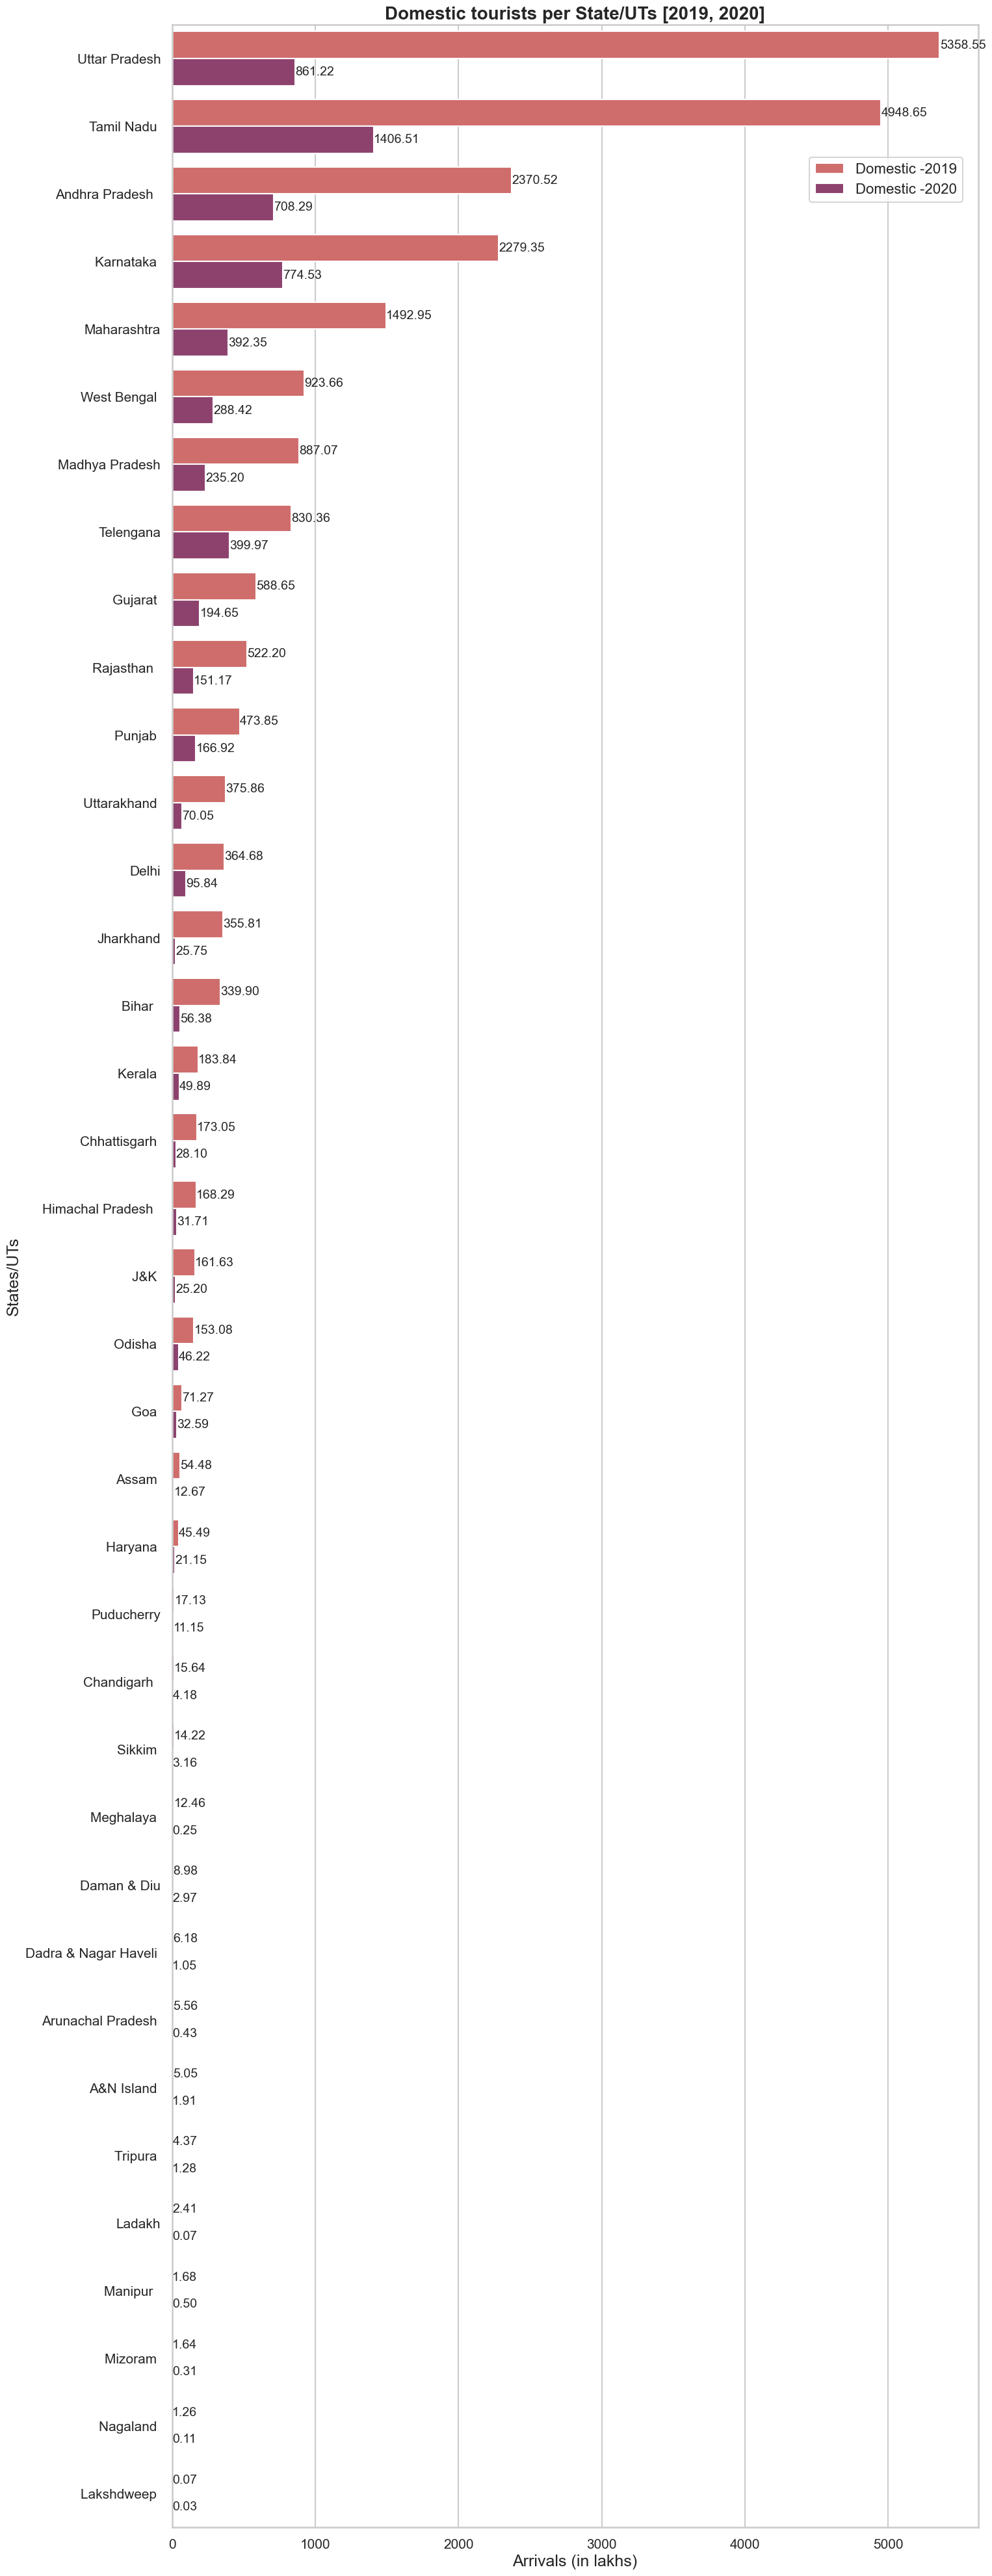

In [141]:
# Combining columns w.r.t 'States/UTs' into a single column 'value' and column 'variable' will distinguish these values 
df=pd.melt(domestic_statewise,['States/UTs']).rename(columns={"variable":"Year"})

plt.figure(figsize=(16,50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='flare')

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.2f}'.format(width), 
            ha = 'left',   
            va = 'center',  
            fontsize=14)
            
plt.title("Domestic tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 16})

plt.show()

## Total tourists per State/UTs [2019 - 2020]

In [142]:
total_statewise=statewise_data[['States/UTs','Domestic -2019','Foreign - 2019','Domestic -2020','Foreign - 2020']].copy()
# calculating total tourists to States/UTs
total_statewise['Total Tourists']= total_statewise['Domestic -2019']+ total_statewise['Foreign - 2019']+ total_statewise['Domestic -2020']+ total_statewise['Foreign - 2020']
total_statewise.drop(['Domestic -2019','Foreign - 2019','Domestic -2020','Foreign - 2020'], axis=1, inplace=True)

total_statewise.sort_values(by=["Total Tourists"], ascending=False, inplace=True)
total_statewise=total_statewise[total_statewise['States/UTs'].isin(['Grand Total'])==False]

total_statewise["Total Tourists"]=total_statewise['Total Tourists']* 10**-6

# fetching the 10 most visited States/UTs
total_statewise=total_statewise.iloc[0:10]

total_statewise.head()

,States/UTs,Total Tourists
31,Tamil Nadu,643.611148
34,Uttar Pradesh,627.613568
1,Andhra Pradesh,308.228045
16,Karnataka,306.162132
21,Maharashtra,195.320407


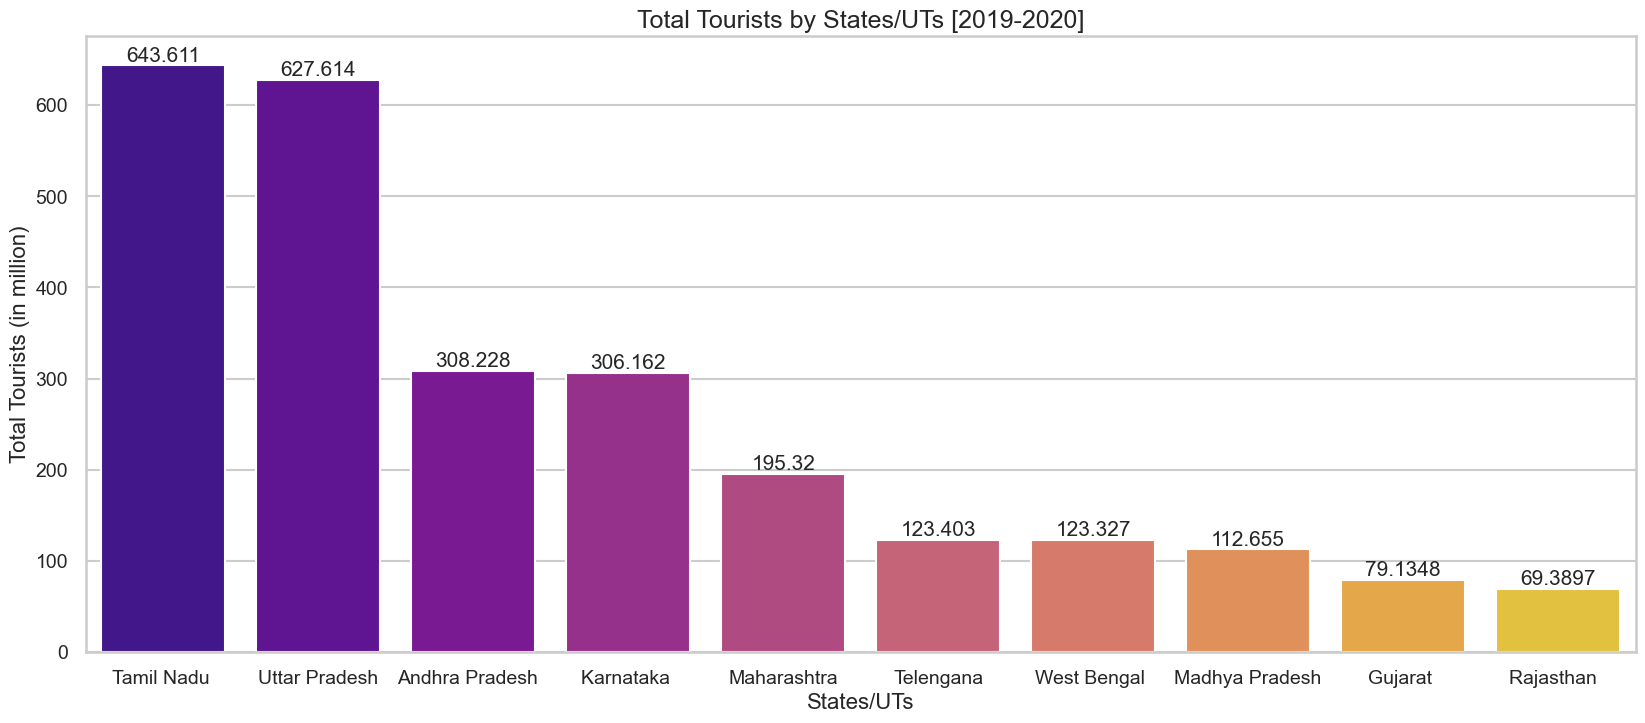

In [147]:
plt.figure(figsize=(20, 8))

# Change the palette to a bold color choice
g = sns.barplot(x=total_statewise['States/UTs'], y=total_statewise['Total Tourists'], palette='plasma')

plt.title("Total Tourists by States/UTs [2019-2020]", fontsize=18)
plt.xlabel("States/UTs", fontsize=16)
plt.ylabel("Total Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15)  # Labeling the bars

# Displaying the chart
plt.show()


# Popular monuments during 2019,2020,2021

## Top 10 Tourism Destinations visited by foreigners 2019

In [148]:
monuments=pd.read_csv('India-Tourism-Statistics-2021-monuments.csv')
monuments.head()

,Circle,Name of the Monument,Domestic-2019-20,Foreign-2019-20,Domestic-2020-21,Foreign-2020-21,% Growth 2021-21/2019-20-Domestic,% Growth 2021-21/2019-20-Foreign
0,Agra,Taj Mahal,4429710,645415,1259892,9034,-71.56,-98.60
1,Agra,Agra Fort,1627154,386522,371242,2810,-77.18,-99.27
2,Agra,Fatehpur Sikri,454376,184751,107835,574,-76.27,-99.69
3,Agra,Akbar Tomb Sikandra,229270,19625,99509,321,-56.60,-98.36
4,Agra,Mariam tomb Sikandra,22517,414,9765,31,-56.63,-92.51


In [85]:
circlewise_tourist=monuments[monuments['Name of the Monument']=='Total'].copy()
circlewise_tourist=circlewise_tourist[['Circle','Foreign-2019-20','Domestic-2019-20']]
# sorting by Foreign-2019-20 in descending order
circlewise_tourist.sort_values(by=['Foreign-2019-20'],ascending=False,inplace= True)

circlewise_tourist['Foreign-2019-20']= circlewise_tourist['Foreign-2019-20']* 10**-3
circlewise_tourist['Domestic-2019-20']= circlewise_tourist['Domestic-2019-20']* 10**-3

circlewise_tourist.head()

,Circle,Foreign-2019-20,Domestic-2019-20
9,Agra,1394.635,7632.914
133,Delhi,581.350,6158.331
25,Sarnath,106.938,847.571
149,Jaipur,88.692,286.164
30,Thrissur,83.629,1044.418


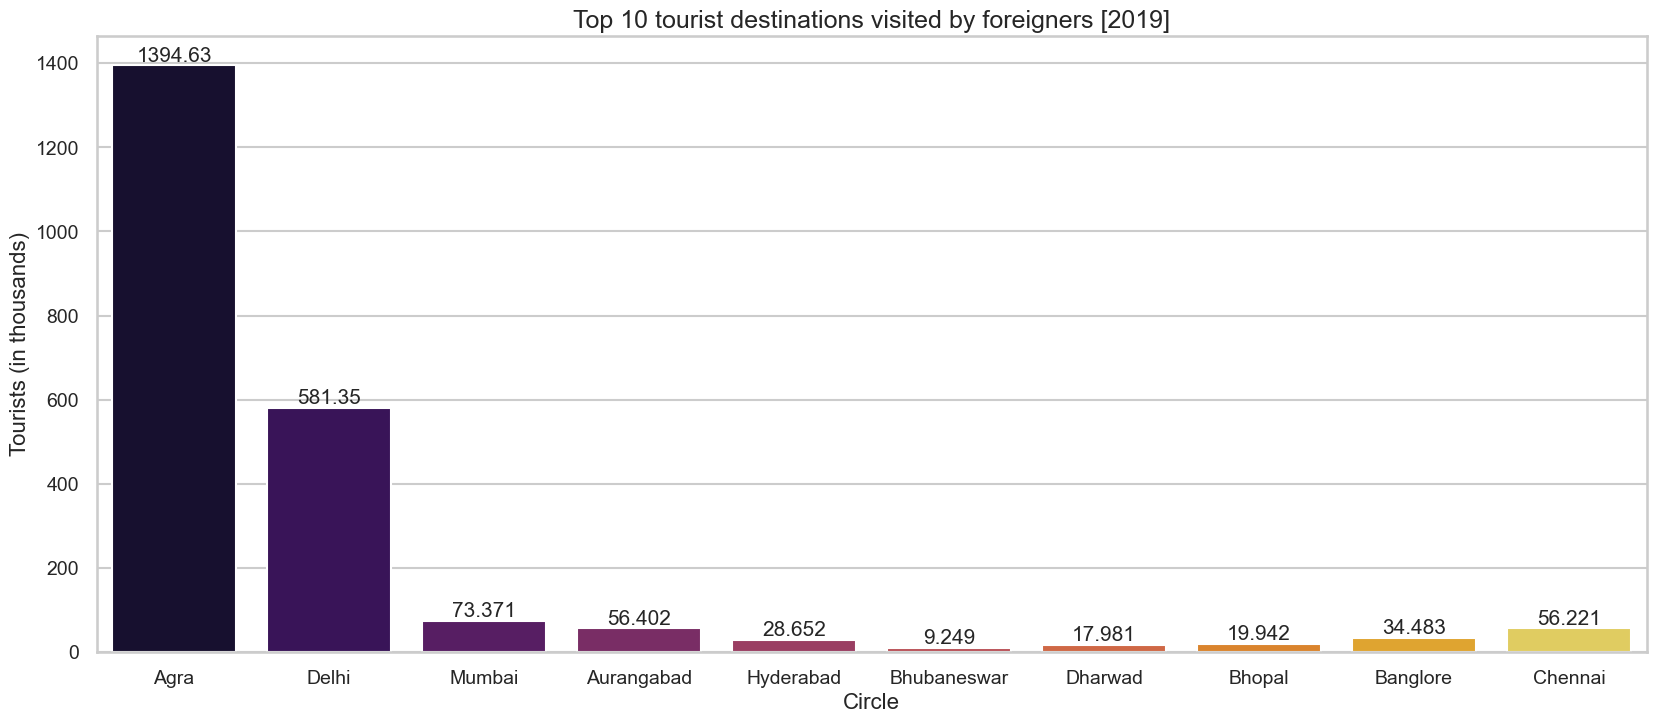

In [150]:
plt.figure(figsize=(20,8))

g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Foreign-2019-20'].iloc[0:10], palette='inferno')

plt.title("Top 10 tourist destinations visited by foreigners [2019]", fontsize=18)
plt.xlabel("Circle", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15) 
plt.show()


# Top 10 Tourism Destinations visited by domestic travellers 2019

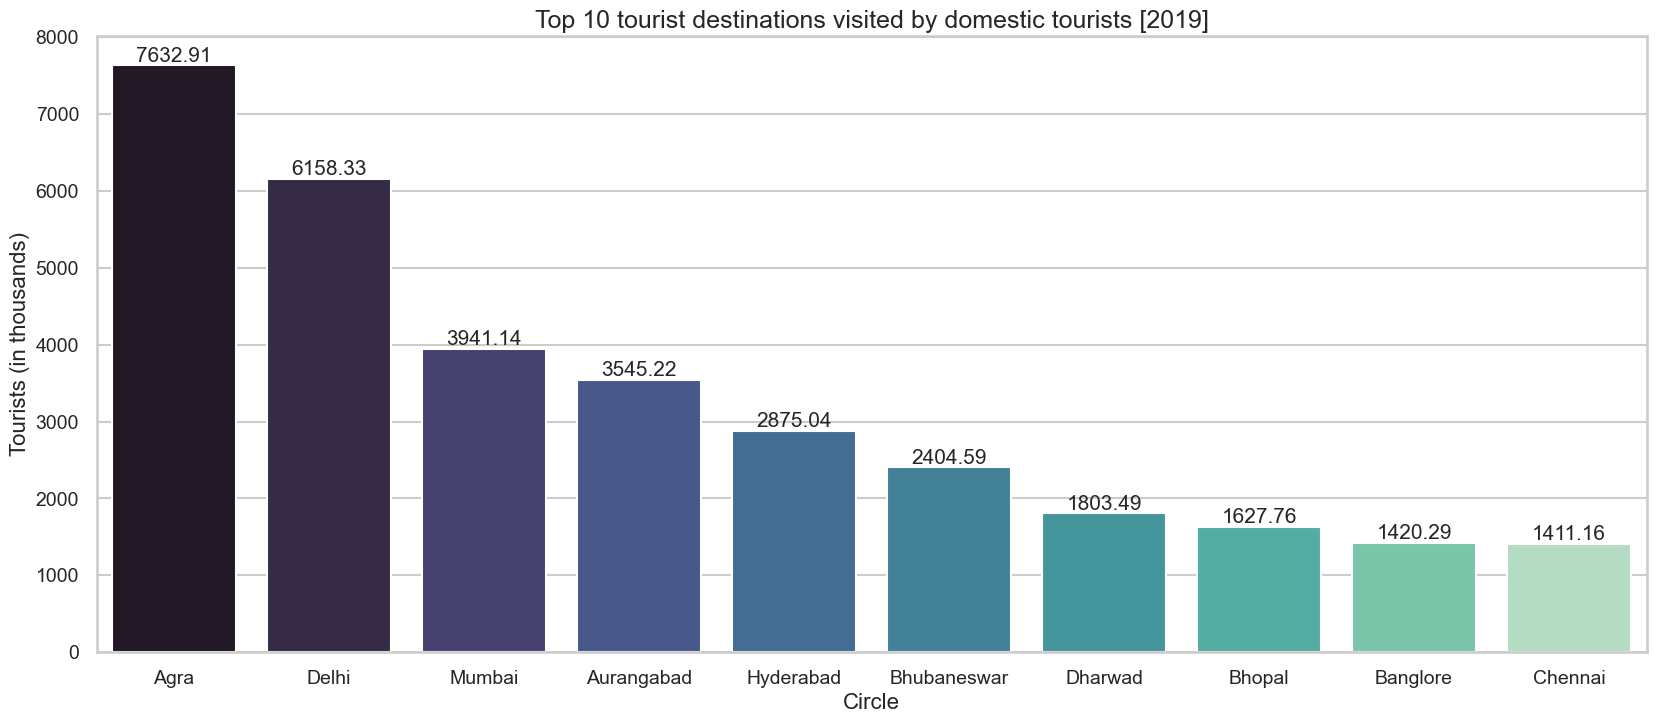

In [151]:
circlewise_tourist.sort_values(by=['Domestic-2019-20'],ascending=False,inplace= True)

plt.figure(figsize=(20,8))

g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Domestic-2019-20'].iloc[0:10], palette='mako')

plt.title("Top 10 tourist destinations visited by domestic tourists [2019]", fontsize=18)
plt.xlabel("Circle", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15)

plt.show()

# Top 10 Monuments visited by foreigners 2019

In [152]:
monument_tourist=monuments[monuments['Name of the Monument'].isin(['Total','Grand Total'])==False].copy()

monument_tourist['Name of the Monument'] = monument_tourist['Name of the Monument']+" ("+monument_tourist['Circle']+")"

monument_tourist=monument_tourist[['Name of the Monument','Foreign-2019-20','Domestic-2019-20']]
monument_tourist.sort_values(by=['Foreign-2019-20'],ascending=False,inplace= True)

monument_tourist['Foreign-2019-20']= monument_tourist['Foreign-2019-20']* 10**-3
monument_tourist['Domestic-2019-20']= monument_tourist['Domestic-2019-20']* 10**-3

monument_tourist.head()

,Name of the Monument,Foreign-2019-20,Domestic-2019-20
0,Taj Mahal (Agra),645.415,4429.710
1,Agra Fort (Agra),386.522,1627.154
127,Qutub Minar (Delhi),255.318,2048.146
126,Humayun Tomb (Delhi),202.288,658.318
2,Fatehpur Sikri (Agra),184.751,454.376


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


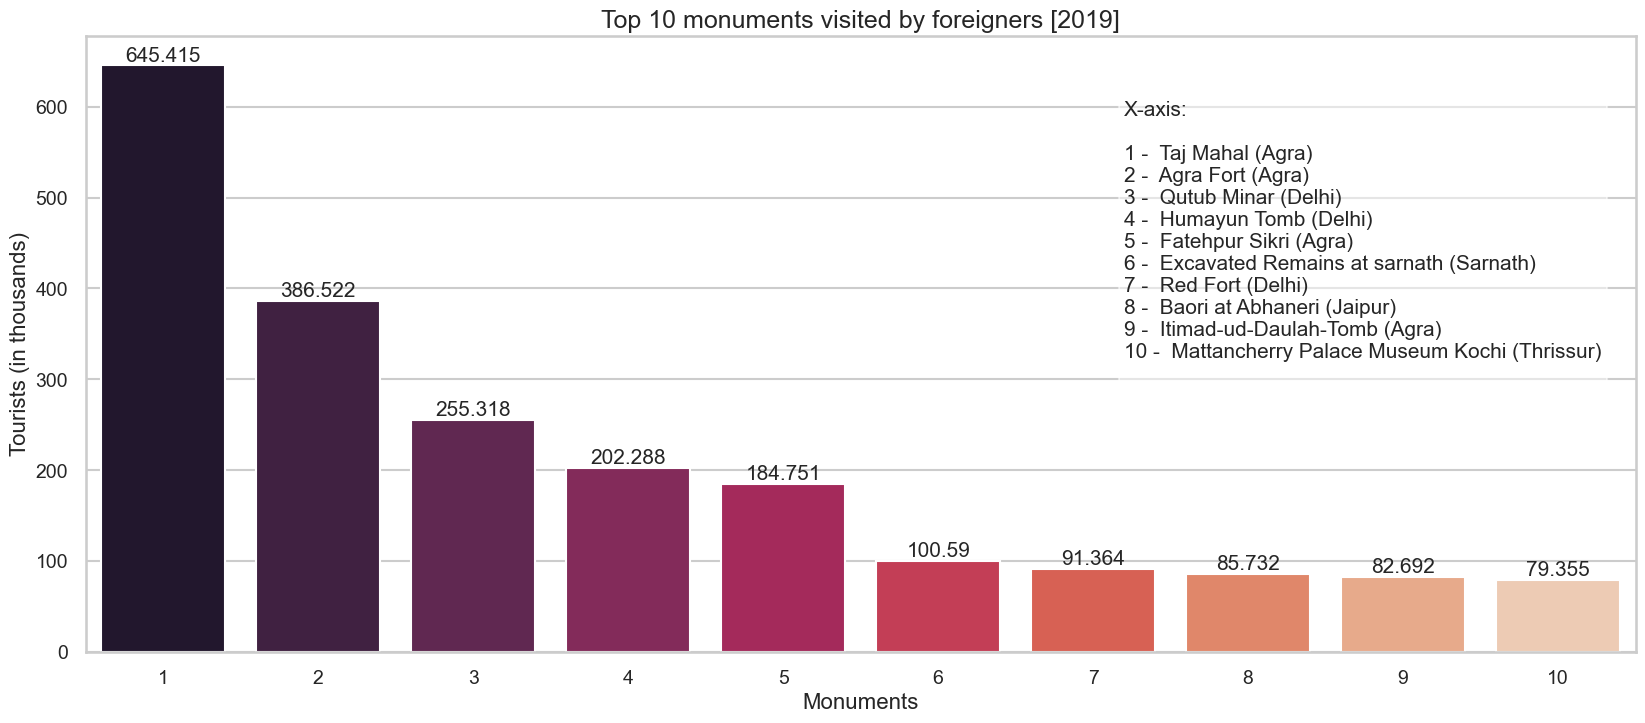

In [155]:
plt.figure(figsize=(20,8))

# picking top 10 visited monuments
x=monument_tourist['Name of the Monument'].iloc[0:10]

g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Foreign-2019-20'].iloc[0:10], palette='rocket')

plt.title("Top 10 monuments visited by foreigners [2019]", fontsize=18)
plt.xlabel("Monuments", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

text="X-axis:\n\n"
for i,value in zip(range(1,11),x):
    text= text + str(i) + " -  " + value + "\n"
    
plt.text(6.2, 300, text, fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

g.bar_label(g.containers[0], fontsize=15) 
plt.show()

C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


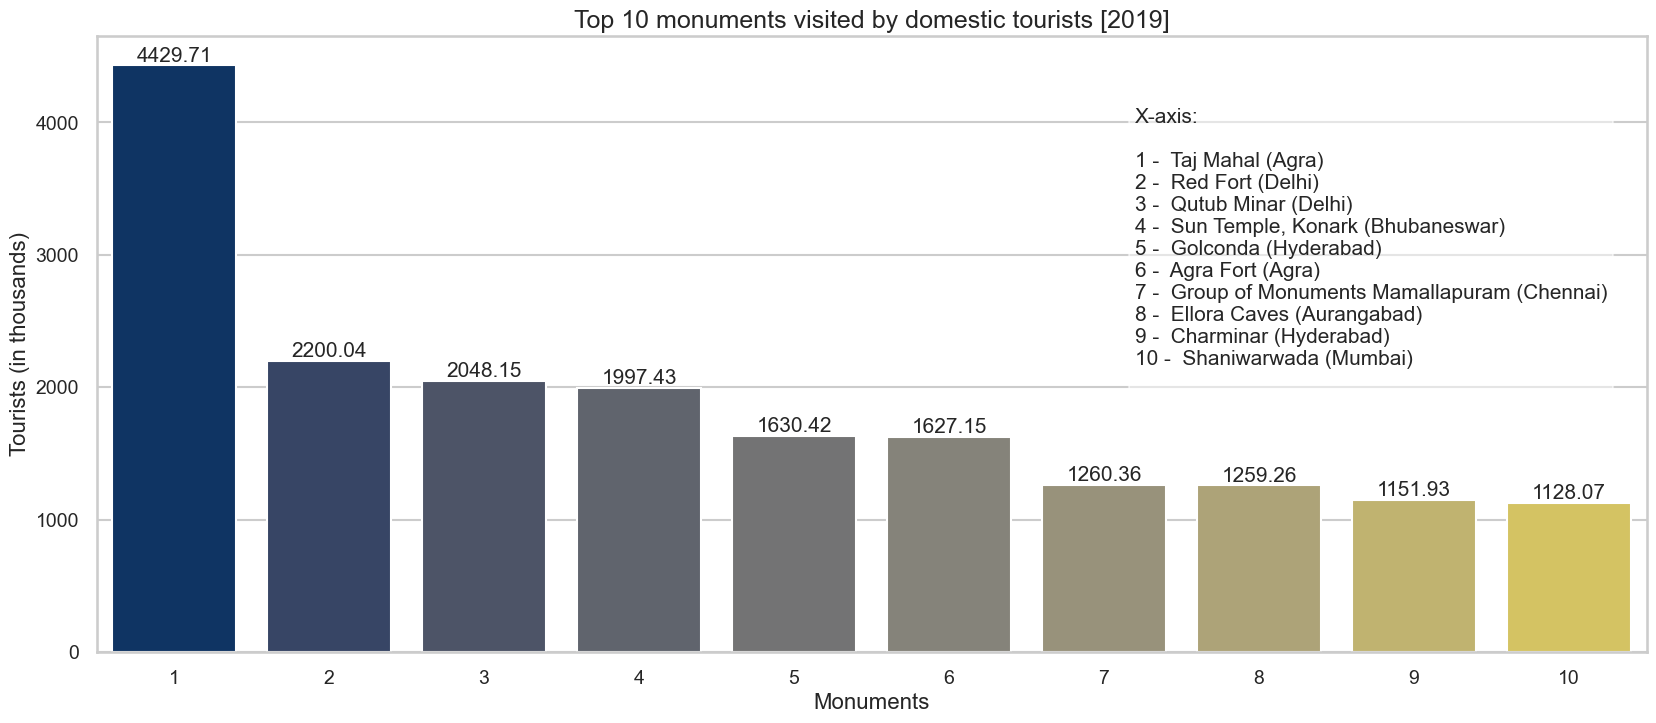

In [156]:
monument_tourist.sort_values(by=['Domestic-2019-20'],ascending=False,inplace= True)

plt.figure(figsize=(20,8))

x=monument_tourist['Name of the Monument'].iloc[0:10]

g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Domestic-2019-20'].iloc[0:10], palette='cividis')

plt.title("Top 10 monuments visited by domestic tourists [2019]", fontsize=18)
plt.xlabel("Monuments", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

text="X-axis:\n\n"
for i,value in zip(range(1,11),x):
    text= text + str(i) + " -  " + value + "\n"
    
plt.text(6.2, 2000, text, fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

g.bar_label(g.containers[0], fontsize=15)
plt.show()

# Position of Indian Tourism in the world [2001 - 2021]

In [157]:
worldvsindia= pd.read_csv('India-Tourism-Statistics-2001-2019-worldvsindia.csv')
worldvsindia.head()

,Year,World - Number (in million),World - % Change,India - Number (in million),India - % Change,Percentage Share of India,Rank of India
0,2001,683.4,0.0,2.54,-4.2,0.37,51st
1,2002,703.2,2.9,2.38,-6.3,0.34,54th
2,2003,691.0,-1.7,2.73,14.7,0.40,51st
3,2004,762.0,10.3,3.46,26.7,0.45,44th
4,2005,803.4,5.4,3.92,13.3,0.49,43rd


In [158]:
worldvsindia_rank=worldvsindia[['Year','World - Number (in million)','India - Number (in million)','Rank of India']].copy()
worldvsindia_rank.fillna('NA',inplace=True)
worldvsindia_rank

,Year,World - Number (in million),India - Number (in million),Rank of India
0,2001,683.4,2.54,51st
1,2002,703.2,2.38,54th
2,2003,691.0,2.73,51st
3,2004,762.0,3.46,44th
4,2005,803.4,3.92,43rd
5,2006,846.6,4.45,44th
6,2007,894.0,5.08,41st
7,2008,917.0,5.28,41st
8,2009,883.0,5.17,41st
9,2010,948.0,5.78,42nd


C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Mishra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

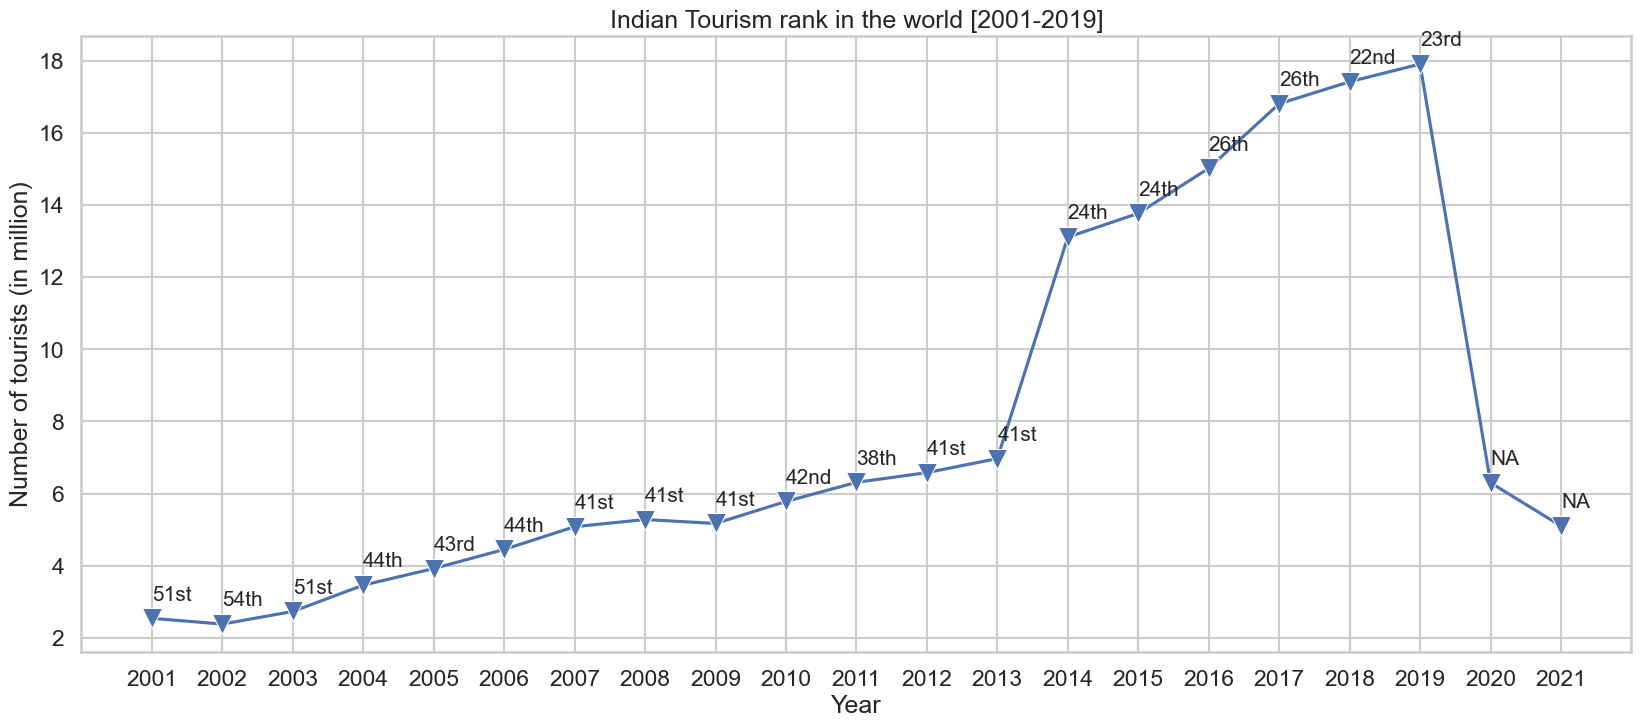

In [159]:
plt.figure(figsize=(20,8))

g=sns.lineplot(x='Year', y='India - Number (in million)', data=worldvsindia_rank, marker= 'v', markersize=14)
g.set(xlabel="Year",ylabel="Number of tourists (in million)", title="Indian Tourism rank in the world [2001-2019]")
    
plt.xticks(
    range(2001,2022),
    fontweight='light'
)

for x,index in zip(g.get_xticks(),worldvsindia_rank.index):
    g.text(x,worldvsindia_rank._get_value(index,'India - Number (in million)')+0.5, worldvsindia_rank._get_value(index,'Rank of India'),size=15)
    
plt.plot()